In [48]:
import pandas as pd

In [49]:
train_df = pd.read_csv("./data/train.csv", index_col='date_id')
train_df.shape

(8990, 97)

In [50]:
test_df = pd.read_csv("./data/test.csv")
test_df.shape

(10, 99)

In [51]:
print(train_df.head)

<bound method NDFrame.head of          D1  D2  D3  D4  D5  D6  D7  D8  D9        E1  ...        V3  \
date_id                                                ...             
0         0   0   0   1   1   0   0   0   1       NaN  ...       NaN   
1         0   0   0   1   1   0   0   0   1       NaN  ...       NaN   
2         0   0   0   1   0   0   0   0   1       NaN  ...       NaN   
3         0   0   0   1   0   0   0   0   0       NaN  ...       NaN   
4         0   0   0   1   0   0   0   0   0       NaN  ...       NaN   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..       ...  ...       ...   
8985      0   0   0   0   0   0   0   0   0  1.565379  ...  0.469577   
8986      0   0   0   0   0   0   0   0   0  1.562946  ...  0.671958   
8987      0   0   1   0   0   0   0   0   0  1.560520  ...  0.481481   
8988      0   0   0   0   0   0   0   0   0  1.558102  ...  0.655423   
8989      0   0   0   0   0   0   0   0   0  1.555690  ...  0.066799   

               V4        V5      

---
## Missing Values

I need to figure out how many missing values there are for each feature and if there's a pattern for the missing values.

In [52]:
# Count NaN values in each column
nan_counts = train_df.isna().sum()
for index, value in nan_counts.items():
    print(index, ": ", value)

incomplete_dict= {}
for index, value in nan_counts.items():
    if value > 1006:
        incomplete_dict[index] = value

print(incomplete_dict)

D1 :  0
D2 :  0
D3 :  0
D4 :  0
D5 :  0
D6 :  0
D7 :  0
D8 :  0
D9 :  0
E1 :  1784
E10 :  1006
E11 :  1006
E12 :  1006
E13 :  1006
E14 :  1006
E15 :  1006
E16 :  1006
E17 :  1006
E18 :  1006
E19 :  1006
E2 :  1006
E20 :  1616
E3 :  1006
E4 :  1006
E5 :  1006
E6 :  1006
E7 :  6969
E8 :  1006
E9 :  1006
I1 :  1006
I2 :  1006
I3 :  1006
I4 :  1006
I5 :  1006
I6 :  1006
I7 :  1006
I8 :  1006
I9 :  1006
M1 :  5547
M10 :  1006
M11 :  1006
M12 :  1006
M13 :  5540
M14 :  5540
M15 :  1006
M16 :  1006
M17 :  1006
M18 :  1006
M2 :  3217
M3 :  2018
M4 :  1006
M5 :  3283
M6 :  5043
M7 :  1006
M8 :  1006
M9 :  1006
P1 :  1006
P10 :  1006
P11 :  1006
P12 :  1006
P13 :  1006
P2 :  1006
P3 :  1006
P4 :  1006
P5 :  1574
P6 :  1638
P7 :  1616
P8 :  1006
P9 :  1006
S1 :  1006
S10 :  1006
S11 :  1006
S12 :  3537
S2 :  1006
S3 :  5733
S4 :  1006
S5 :  1511
S6 :  1006
S7 :  1006
S8 :  3009
S9 :  1006
V1 :  1006
V10 :  6049
V11 :  1006
V12 :  1006
V13 :  1511
V2 :  1006
V3 :  1006
V4 :  1006
V5 :  1512
V6 :  

---
### Missing value distribution
There are a lot of missing values. Here, I'm creating a heatmap of the missing values to see where how the missing values are distributed in the dataset. We can see that the first 1006 entries are missing values for most of the features. Outside of these first 1006 entries, we have additional missing values for certain features extending deeper into the dataset.

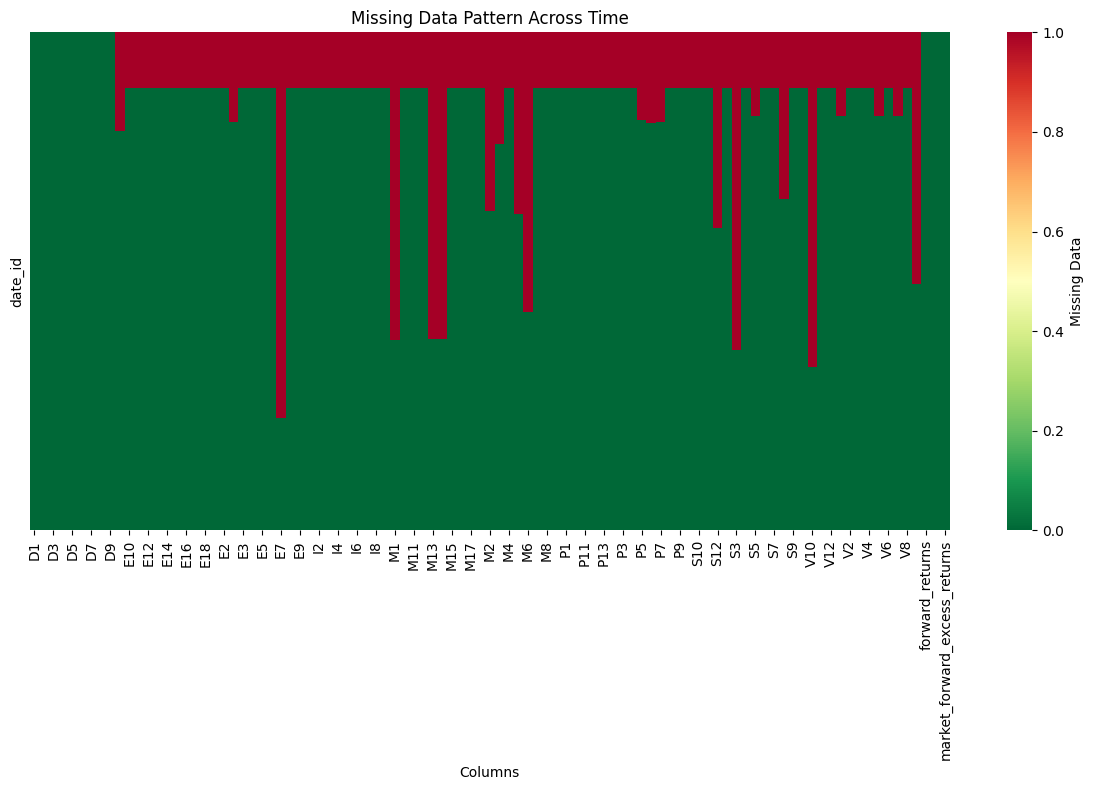

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

missing_mask = train_df.isna()

plt.figure(figsize=(12, 8))
sns.heatmap(
    missing_mask, 
    cbar=True,
    cmap='RdYlGn_r',
    yticklabels=False,
    cbar_kws={'label': 'Missing Data'}
)

plt.title('Missing Data Pattern Across Time')
plt.xlabel('Columns')
plt.ylabel('date_id')
plt.tight_layout()
plt.show()

---
# Normalization
---
#### Analyzing data range
I'm probably going to have to normalize the data before I perform any imputation of missing values. Here, I analyze the ranges of the features.

In [6]:
import pandas as pd
import numpy as np

def analyze_column_ranges(df):
    stats = []
    
    for col in df.columns:
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            stats.append({
                'Column': col,
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Range': col_data.max() - col_data.min(),
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Std': col_data.std(),
                'Non-NaN Count': len(col_data),
                'NaN Count': df[col].isna().sum()
            })
        else:
            stats.append({
                'Column': col,
                'Min': np.nan,
                'Max': np.nan,
                'Range': np.nan,
                'Mean': np.nan,
                'Median': np.nan,
                'Std': np.nan,
                'Non-NaN Count': 0,
                'NaN Count': len(df)
            })
    
    stats_df = pd.DataFrame(stats)
    
    print("="*100)
    print("COLUMN STATISTICS AND RANGES")
    print("="*100)
    print(stats_df.to_string(index=False))
    
    # Additional summary
    print("\n" + "="*100)
    print("SUMMARY")
    print("="*100)
    print(f"Column with largest range: {stats_df.loc[stats_df['Range'].idxmax(), 'Column']} "
          f"(Range: {stats_df['Range'].max():.2f})")
    print(f"Column with smallest range: {stats_df.loc[stats_df['Range'].idxmin(), 'Column']} "
          f"(Range: {stats_df['Range'].min():.2f})")
    print(f"\nRange ratio (max/min): {stats_df['Range'].max() / stats_df['Range'].min():.2f}x")
    
    return stats_df


def visualize_column_ranges(df):
    """
    Create visualizations of column ranges
    """
    import matplotlib.pyplot as plt
    
    stats = []
    for col in df.columns:
        col_data = df[col].dropna()
        if len(col_data) > 0:
            stats.append({
                'Column': col,
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Range': col_data.max() - col_data.min()
            })
    
    stats_df = pd.DataFrame(stats)
    stats_df = stats_df.sort_values('Range', ascending=True)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Bar chart of ranges
    axes[0].barh(stats_df['Column'], stats_df['Range'])
    axes[0].set_xlabel('Range (Max - Min)')
    axes[0].set_ylabel('Column')
    axes[0].set_title('Range of Values by Column')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Log scale version (useful if ranges vary by orders of magnitude)
    axes[1].barh(stats_df['Column'], stats_df['Range'])
    axes[1].set_xlabel('Range (Max - Min) - Log Scale')
    axes[1].set_ylabel('Column')
    axes[1].set_title('Range of Values by Column (Log Scale)')
    axes[1].set_xscale('log')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()



COLUMN STATISTICS AND RANGES
                       Column        Min       Max     Range      Mean    Median      Std  Non-NaN Count  NaN Count
                           D1   0.000000  1.000000  1.000000  0.031591  0.000000 0.174917           8990          0
                           D2   0.000000  1.000000  1.000000  0.031591  0.000000 0.174917           8990          0
                           D3   0.000000  1.000000  1.000000  0.047831  0.000000 0.213420           8990          0
                           D4   0.000000  1.000000  1.000000  0.575195  1.000000 0.494341           8990          0
                           D5   0.000000  1.000000  1.000000  0.190656  0.000000 0.392840           8990          0
                           D6  -1.000000  0.000000  1.000000 -0.238042  0.000000 0.425909           8990          0
                           D7   0.000000  1.000000  1.000000  0.045717  0.000000 0.208883           8990          0
                           D8   0.000000  1

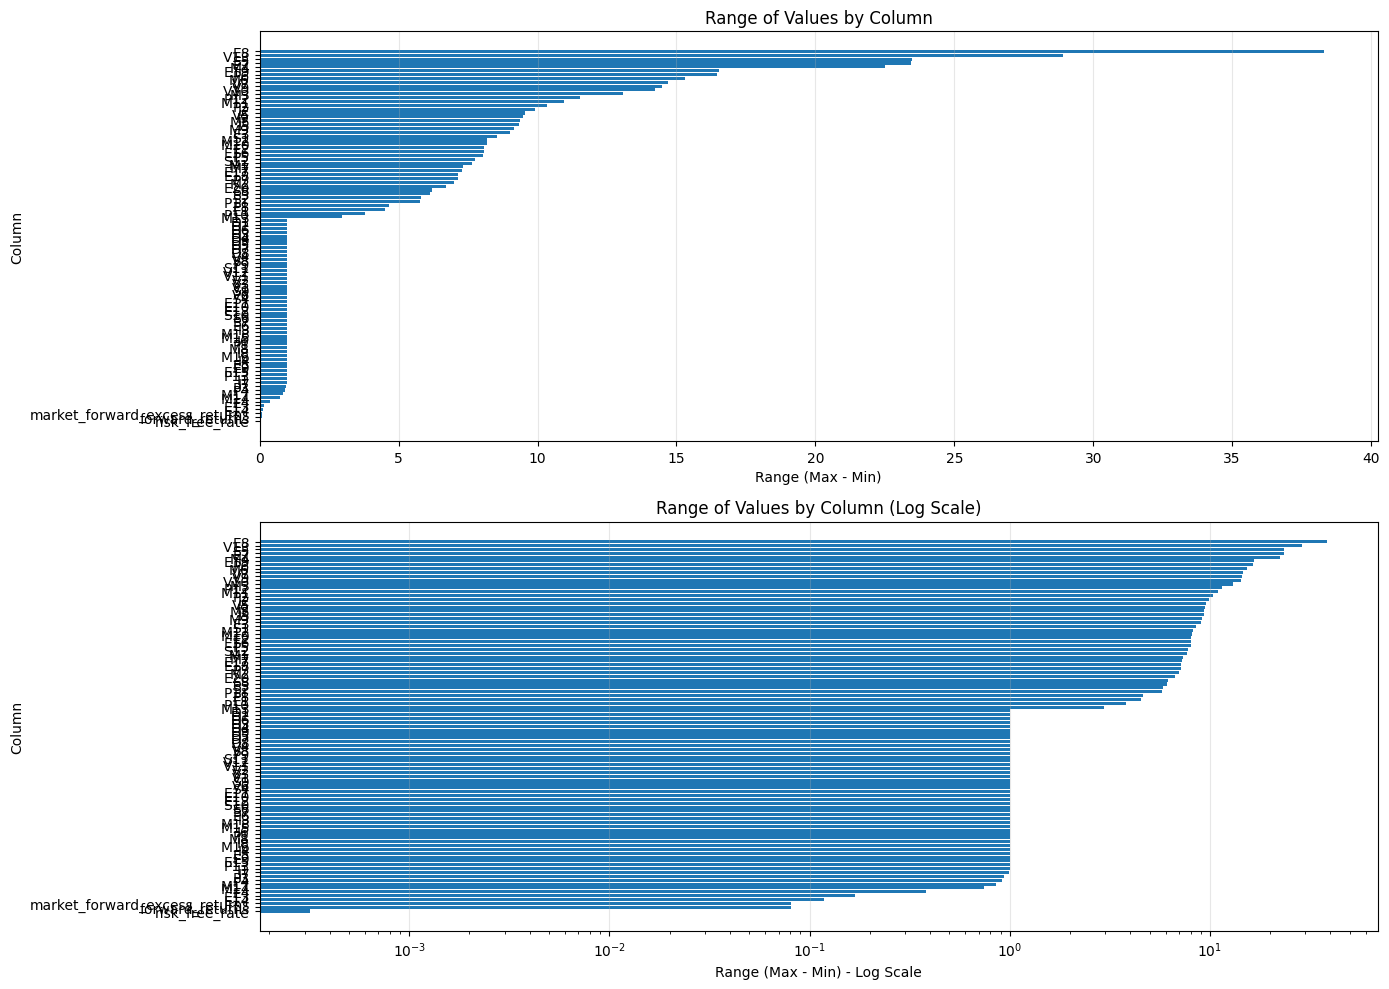

In [7]:
stats_df = analyze_column_ranges(train_df)
visualize_column_ranges(train_df)

---
#### Actual Normalization
In the normalization function, I'm providing an argument for columns to exclude from normalization. For the purposes of KNN imputation, we won't exclude any columns from normalization. However, once we are curating the data for training, the Y labels shouldn't be normalized. This argument will come in handy then.

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


def normalize_data(df, method='standard', exclude_cols=None):
    """
    Normalize data for KNN imputation, excluding specified columns
    
    Parameters:
    - df: DataFrame to normalize
    - method: 'standard' (default), 'minmax', or 'robust'
    - exclude_cols: List of column names to exclude from normalization (e.g., ['date_id'])
    
    Returns:
    - normalized_df: Normalized DataFrame
    - scaler: Fitted scaler object
    - excluded_data: DataFrame of excluded columns
    """
    
    if exclude_cols is None:
        exclude_cols = []
    
    # Separate columns to normalize from columns to exclude
    cols_to_normalize = [col for col in df.columns if col not in exclude_cols]
    
    # Store excluded columns
    excluded_data = df[exclude_cols].copy() if exclude_cols else pd.DataFrame(index=df.index)
    
    # Get data to normalize
    data_to_normalize = df[cols_to_normalize].copy()
    
    # Choose scaler
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("method must be 'standard', 'minmax', or 'robust'")
    
    # Fit and transform
    scaler.fit(data_to_normalize)
    normalized_array = scaler.transform(data_to_normalize)
    
    # Convert back to DataFrame
    normalized_df = pd.DataFrame(
        normalized_array,
        columns=cols_to_normalize,
        index=df.index
    )
    
    # Combine normalized data with excluded columns
    if exclude_cols:
        normalized_df = pd.concat([excluded_data, normalized_df], axis=1)
        # Reorder columns to match original
        normalized_df = normalized_df[df.columns]
    
    print(f"Data normalized using {method} scaling")
    print(f"Excluded columns: {exclude_cols}")
    print(f"Normalized columns: {cols_to_normalize}")
    print(f"Shape: {normalized_df.shape}")
    
    return normalized_df, scaler, cols_to_normalize

def inverse_transform_results(imputed_df, scaler, cols_excluded=[]):
    """
    Convert normalized imputed values back to original scale
    Only transforms the columns that were originally normalized
    
    Parameters:
    - imputed_df: DataFrame with imputed values (normalized + excluded columns)
    - scaler: The scaler object used for normalization
    - cols_excluded: List of column names that were NOT normalized (e.g., ['date_id'])
    
    Returns:
    - original_scale_df: DataFrame in original scale
    """
    # Determine which columns were normalized (all except excluded)
    cols_normalized = [col for col in imputed_df.columns if col not in cols_excluded]
    
    # Store excluded columns
    excluded_data = imputed_df[cols_excluded].copy() if cols_excluded else pd.DataFrame(index=imputed_df.index)
    
    # Get normalized data
    normalized_data = imputed_df[cols_normalized]
    
    # Inverse transform only the normalized columns
    original_scale_array = scaler.inverse_transform(normalized_data)
    
    original_scale_df = pd.DataFrame(
        original_scale_array,
        columns=cols_normalized,
        index=imputed_df.index
    )
    
    # Combine with excluded columns
    if cols_excluded:
        original_scale_df = pd.concat([excluded_data, original_scale_df], axis=1)
        # Reorder to match original column order
        original_scale_df = original_scale_df[imputed_df.columns]
    
    return original_scale_df


# Example usage:
"""
# After imputation on normalized data
df_imputed_normalized = ...  # Your imputed DataFrame (still normalized)

# Convert back to original scale
df_imputed_original = inverse_transform_results(
    imputed_df=df_imputed_normalized,
    scaler=scaler,  # The scaler you used for normalization
    cols_excluded=['date_id']  # Columns that were never normalized
)
"""


# Usage:
# If date_id is a column in your dataframe:
# results = test_knn_with_normalization(df, n_neighbors=5, exclude_cols=['date_id'])

# If date_id is the index, reset it first:
# df_with_date_id = df.reset_index()
# results = test_knn_with_normalization(df_with_date_id, n_neighbors=5, exclude_cols=['date_id'])

"\n# After imputation on normalized data\ndf_imputed_normalized = ...  # Your imputed DataFrame (still normalized)\n\n# Convert back to original scale\ndf_imputed_original = inverse_transform_results(\n    imputed_df=df_imputed_normalized,\n    scaler=scaler,  # The scaler you used for normalization\n    cols_excluded=['date_id']  # Columns that were never normalized\n)\n"

In [11]:
normalized_df, scaler, col_names = normalize_data(train_df, method='standard')

# This is how we'll translate back to the original scale.
# imputed_original_scale = inverse_transform_results(imputed_normalized_df, scaler)

Data normalized using standard scaling
Excluded columns: []
Normalized columns: ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
Shape: (8990, 97)


---
# Imputation
KNN imputation will likely make the most sense for this dataset because we have large blocks of data missing for some features. Below is a class that will perform imputation on individual columns. It also provides a method called test_imputation which will take the known values, mask a fraction of them, perform KNN to fill the masked values, and then compare the KNN values to the masked ground truths. This class also provides a helper function which will test KNN imputation for different values of K and provide a report to see which values of K achieve the highest values for R^2 and lowest values for Mean Absolute Error.

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class ColumnWiseKNNImputer:
    """
    Perform KNN imputation on individual columns with the ability to exclude columns
    from the neighbor calculation while still using them for context.
    """
    
    def __init__(self, n_neighbors=5, exclude_from_distance=None):
        """
        Parameters:
        - n_neighbors: number of neighbors for KNN
        - exclude_from_distance: list of columns to exclude from distance calculation
                                 (e.g., ['date_id', 'symbol'])
        """
        self.n_neighbors = n_neighbors
        self.exclude_from_distance = exclude_from_distance or []
        self.scalers = {}
        
    def impute_column(self, df, target_column, normalize=True):
        """
        Impute a single column using KNN based on all other columns
        
        Parameters:
        - df: DataFrame with data
        - target_column: name of column to impute
        - normalize: whether to normalize data before KNN
        
        Returns:
        - imputed_series: Series with imputed values for target column
        - feature_columns: list of columns used for KNN distance calculation
        """
        
        if target_column not in df.columns:
            raise ValueError(f"Column '{target_column}' not found in DataFrame")
        
        # Determine which columns to use for KNN distance calculation
        all_columns = df.columns.tolist()
        feature_columns = [col for col in all_columns 
                          if col not in self.exclude_from_distance]
        
        print(f"\nImputing column: '{target_column}'")
        print(f"Using {len(feature_columns)} columns for distance calculation")
        print(f"Excluded from distance: {self.exclude_from_distance}")
        
        # Select only the feature columns for imputation
        df_features = df[feature_columns].copy()
        
        # Normalize if requested
        if normalize:
            scaler = StandardScaler()
            # Fit on all non-NaN data
            scaler.fit(df_features)
            df_normalized = pd.DataFrame(
                scaler.transform(df_features),
                columns=feature_columns,
                index=df_features.index
            )
            self.scalers[target_column] = scaler
        else:
            df_normalized = df_features
            self.scalers[target_column] = None
        
        # Perform KNN imputation
        imputer = KNNImputer(n_neighbors=self.n_neighbors)
        imputed_array = imputer.fit_transform(df_normalized)
        
        # Extract the imputed target column
        target_idx = feature_columns.index(target_column)
        imputed_normalized = imputed_array[:, target_idx]
        
        # Inverse transform if we normalized
        if normalize and self.scalers[target_column] is not None:
            # Create a dummy array for inverse transform
            dummy = np.zeros((len(imputed_normalized), len(feature_columns)))
            dummy[:, target_idx] = imputed_normalized
            imputed_original = self.scalers[target_column].inverse_transform(dummy)[:, target_idx]
        else:
            imputed_original = imputed_normalized
        
        imputed_series = pd.Series(imputed_original, index=df.index, name=target_column)
        
        return imputed_series, feature_columns
    
    def test_imputation(
        self, df, target_column, test_fraction=0.1, 
        random_state=42, normalize=True, missing_values_num=-1
    ):
        """
        Test imputation accuracy by masking known values
        
        Parameters:
        - df: DataFrame with data
        - target_column: column to test
        - test_fraction: fraction of non-NaN values to mask
        - random_state: for reproducibility
        - normalize: whether to normalize before KNN
        
        Returns:
        - results: dictionary with metrics and test data
        """
        
        np.random.seed(random_state)
        
        # Create a copy
        df_test = df.copy()
        
        # Get non-NaN indices for target column
        non_nan_mask = df_test[target_column].notna()
        non_nan_indices = df_test.index[non_nan_mask].tolist()
        
        if len(non_nan_indices) == 0:
            raise ValueError(f"Column '{target_column}' has no non-NaN values to test")
        
        # Randomly select indices to mask
        n_to_mask = max(1, int(len(non_nan_indices) * test_fraction))
        masked_indices = np.random.choice(non_nan_indices, size=n_to_mask, replace=False)
        
        # Store original values
        original_values = df_test.loc[masked_indices, target_column].copy()
        
        # Mask the values
        df_test.loc[masked_indices, target_column] = np.nan
        
        print(f"\n{'='*70}")
        print(f"Testing imputation for column: '{target_column}'")
        print(f"{'='*70}")
        print(f"Masked {n_to_mask} values ({test_fraction*100:.1f}% of non-NaN values)")
        
        # Perform imputation
        imputed_series, feature_columns = self.impute_column(
            df_test, target_column, normalize=normalize
        )
        
        # Get imputed values at masked positions
        imputed_values = imputed_series.loc[masked_indices]
        
        # Calculate metrics
        mae = mean_absolute_error(original_values, imputed_values)
        rmse = np.sqrt(mean_squared_error(original_values, imputed_values))
        r2 = r2_score(original_values, imputed_values)
        
        # MAPE (avoid division by zero)
        mask_nonzero = original_values != 0
        if mask_nonzero.sum() > 0:
            mape = np.mean(np.abs((original_values[mask_nonzero] - imputed_values[mask_nonzero]) 
                                  / original_values[mask_nonzero])) * 100
        else:
            mape = np.nan
        
        # Calculate residuals
        residuals = original_values - imputed_values
        
        print(f"\n{'='*70}")
        print(f"PERFORMANCE METRICS")
        print(f"{'='*70}")
        print(f"Mean Absolute Error (MAE):           {mae:.6f}")
        print(f"Root Mean Squared Error (RMSE):      {rmse:.6f}")
        print(f"R² Score:                            {r2:.6f}")
        print(f"Mean Absolute Percentage Error:      {mape:.2f}%")
        print(f"{'='*70}")
        
        results = {
            'target_column': target_column,
            'n_neighbors': self.n_neighbors,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'mape': mape,
            'original_values': original_values.values,
            'imputed_values': imputed_values.values,
            'missing_values_num': missing_values_num,
            'residuals': residuals.values,
            'masked_indices': masked_indices,
            'feature_columns': feature_columns,
            'n_masked': n_to_mask
        }
        
        return results
    
    def visualize_test_results(self, results):
        """
        Create comprehensive visualizations of test results
        
        Parameters:
        - results: output from test_imputation()
        """
        
        original = results['original_values']
        imputed = results['imputed_values']
        residuals = results['residuals']
        target_col = results['target_column']
        
        fig = plt.figure(figsize=(16, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
        
        # 1. Actual vs Imputed scatter
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.scatter(original, imputed, alpha=0.5, s=30)
        min_val = min(original.min(), imputed.min())
        max_val = max(original.max(), imputed.max())
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        ax1.set_xlabel('Actual Values', fontsize=10)
        ax1.set_ylabel('Imputed Values', fontsize=10)
        ax1.set_title(f'Actual vs Imputed\n{target_col}', fontsize=11, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Residual plot
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.scatter(original, residuals, alpha=0.5, s=30)
        ax2.axhline(y=0, color='r', linestyle='--', lw=2)
        ax2.set_xlabel('Actual Values', fontsize=10)
        ax2.set_ylabel('Residuals (Actual - Imputed)', fontsize=10)
        ax2.set_title('Residual Plot', fontsize=11, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # 3. Metrics summary
        ax3 = fig.add_subplot(gs[0, 2])
        ax3.axis('off')
        metrics_text = f"""
        PERFORMANCE METRICS
        {'='*35}
        
        MAE:     {results['mae']:.6f}
        RMSE:    {results['rmse']:.6f}
        R²:      {results['r2']:.6f}
        MAPE:    {results['mape']:.2f}%
        
        {'='*35}
        K neighbors:     {results['n_neighbors']}
        Test samples:    {results['n_masked']}
        Features used:   {len(results['feature_columns'])}
        """
        ax3.text(0.1, 0.5, metrics_text, fontsize=10, family='monospace',
                verticalalignment='center')
        
        # 4. Distribution of errors
        ax4 = fig.add_subplot(gs[1, 0])
        ax4.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        ax4.axvline(x=0, color='r', linestyle='--', lw=2)
        ax4.set_xlabel('Error (Actual - Imputed)', fontsize=10)
        ax4.set_ylabel('Frequency', fontsize=10)
        ax4.set_title('Distribution of Errors', fontsize=11, fontweight='bold')
        ax4.grid(True, alpha=0.3, axis='y')
        
        # 5. Absolute errors
        ax5 = fig.add_subplot(gs[1, 1])
        abs_errors = np.abs(residuals)
        ax5.hist(abs_errors, bins=50, edgecolor='black', alpha=0.7, color='coral')
        ax5.set_xlabel('Absolute Error', fontsize=10)
        ax5.set_ylabel('Frequency', fontsize=10)
        ax5.set_title('Distribution of Absolute Errors', fontsize=11, fontweight='bold')
        ax5.grid(True, alpha=0.3, axis='y')
        
        # 6. Q-Q plot for normality of residuals
        ax6 = fig.add_subplot(gs[1, 2])
        from scipy import stats
        stats.probplot(residuals, dist="norm", plot=ax6)
        ax6.set_title('Q-Q Plot (Residuals)', fontsize=11, fontweight='bold')
        ax6.grid(True, alpha=0.3)
        
        # 7. Actual values distribution
        ax7 = fig.add_subplot(gs[2, 0])
        ax7.hist(original, bins=50, edgecolor='black', alpha=0.7, color='green')
        ax7.set_xlabel('Actual Values', fontsize=10)
        ax7.set_ylabel('Frequency', fontsize=10)
        ax7.set_title('Distribution of Actual Values', fontsize=11, fontweight='bold')
        ax7.grid(True, alpha=0.3, axis='y')
        
        # 8. Imputed values distribution
        ax8 = fig.add_subplot(gs[2, 1])
        ax8.hist(imputed, bins=50, edgecolor='black', alpha=0.7, color='orange')
        ax8.set_xlabel('Imputed Values', fontsize=10)
        ax8.set_ylabel('Frequency', fontsize=10)
        ax8.set_title('Distribution of Imputed Values', fontsize=11, fontweight='bold')
        ax8.grid(True, alpha=0.3, axis='y')
        
        # 9. Error by actual value magnitude (binned)
        ax9 = fig.add_subplot(gs[2, 2])
        # Bin the actual values and calculate mean absolute error per bin
        n_bins = 10
        bins = np.linspace(original.min(), original.max(), n_bins + 1)
        bin_indices = np.digitize(original, bins)
        bin_mae = []
        bin_centers = []
        for i in range(1, n_bins + 1):
            mask = bin_indices == i
            if mask.sum() > 0:
                bin_mae.append(np.mean(np.abs(residuals[mask])))
                bin_centers.append((bins[i-1] + bins[i]) / 2)
        
        ax9.plot(bin_centers, bin_mae, marker='o', linewidth=2, markersize=8)
        ax9.set_xlabel('Actual Value (Binned)', fontsize=10)
        ax9.set_ylabel('Mean Absolute Error', fontsize=10)
        ax9.set_title('Error by Value Magnitude', fontsize=11, fontweight='bold')
        ax9.grid(True, alpha=0.3)
        
        plt.suptitle(f'KNN Imputation Test Results: {target_col}', 
                    fontsize=14, fontweight='bold', y=0.995)
        
        plt.show()
        
    def compare_k_values(self, df, target_column, k_values=[3, 5, 10, 15, 20, 25],
                        test_fraction=0.1, random_state=42, normalize=True):
        """
        Test multiple k values and compare performance
        
        Parameters:
        - df: DataFrame
        - target_column: column to test
        - k_values: list of k values to test
        - test_fraction: fraction to mask for testing
        - random_state: for reproducibility
        - normalize: whether to normalize
        
        Returns:
        - comparison_df: DataFrame with results for each k
        """
        
        results_list = []
        
        for k in k_values:
            print(f"\n{'#'*70}")
            print(f"Testing K = {k}")
            print(f"{'#'*70}")
            
            # Create new imputer with this k value
            imputer = ColumnWiseKNNImputer(
                n_neighbors=k,
                exclude_from_distance=self.exclude_from_distance
            )
            
            # Test imputation
            results = imputer.test_imputation(
                df, target_column, 
                test_fraction=test_fraction,
                random_state=random_state,
                normalize=normalize
            )
            
            results_list.append({
                'k': k,
                'mae': results['mae'],
                'rmse': results['rmse'],
                'r2': results['r2'],
                'mape': results['mape']
            })
        
        comparison_df = pd.DataFrame(results_list)
        
        # Visualize comparison
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        axes[0, 0].plot(comparison_df['k'], comparison_df['mae'], 
                       marker='o', linewidth=2, markersize=8, color='steelblue')
        axes[0, 0].set_xlabel('k (number of neighbors)', fontsize=11)
        axes[0, 0].set_ylabel('MAE', fontsize=11)
        axes[0, 0].set_title('Mean Absolute Error vs k', fontsize=12, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        axes[0, 1].plot(comparison_df['k'], comparison_df['rmse'], 
                       marker='o', linewidth=2, markersize=8, color='coral')
        axes[0, 1].set_xlabel('k (number of neighbors)', fontsize=11)
        axes[0, 1].set_ylabel('RMSE', fontsize=11)
        axes[0, 1].set_title('Root Mean Squared Error vs k', fontsize=12, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)
        
        axes[1, 0].plot(comparison_df['k'], comparison_df['r2'], 
                       marker='o', linewidth=2, markersize=8, color='green')
        axes[1, 0].set_xlabel('k (number of neighbors)', fontsize=11)
        axes[1, 0].set_ylabel('R² Score', fontsize=11)
        axes[1, 0].set_title('R² Score vs k', fontsize=12, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        axes[1, 1].plot(comparison_df['k'], comparison_df['mape'], 
                       marker='o', linewidth=2, markersize=8, color='purple')
        axes[1, 1].set_xlabel('k (number of neighbors)', fontsize=11)
        axes[1, 1].set_ylabel('MAPE (%)', fontsize=11)
        axes[1, 1].set_title('Mean Absolute Percentage Error vs k', 
                           fontsize=12, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.suptitle(f'K Value Comparison: {target_column}', 
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"\n{'='*70}")
        print("COMPARISON SUMMARY")
        print(f"{'='*70}")
        print(comparison_df.to_string(index=False))
        print(f"{'='*70}")
        print(f"Best k by MAE:  {comparison_df.loc[comparison_df['mae'].idxmin(), 'k']}")
        print(f"Best k by RMSE: {comparison_df.loc[comparison_df['rmse'].idxmin(), 'k']}")
        print(f"Best k by R²:   {comparison_df.loc[comparison_df['r2'].idxmax(), 'k']}")
        print(f"{'='*70}")
        
        return comparison_df

---
### Running the tests
Here, we run the tests for each column to determine which columns are able to be most reliably imputed via KNN. Each column run, we write a CSV file that contains the results of the test. This includes evaluation metrics for each KNN K value. The CSV file is named "{column_name}.csv"


######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'E1'
Masked 720 values (10.0% of non-NaN values)

Imputing column: 'E1'
Using 76 columns for distance calculation
Excluded from distance: {'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.012147
Root Mean Squared Error (RMSE):      0.055240
R² Score:                            0.992579
Mean Absolute Percentage Error:      0.77%

######################################################################
Testing K = 5
######################################################################

Testing imputation for column: 'E1'
Masked 720 values 

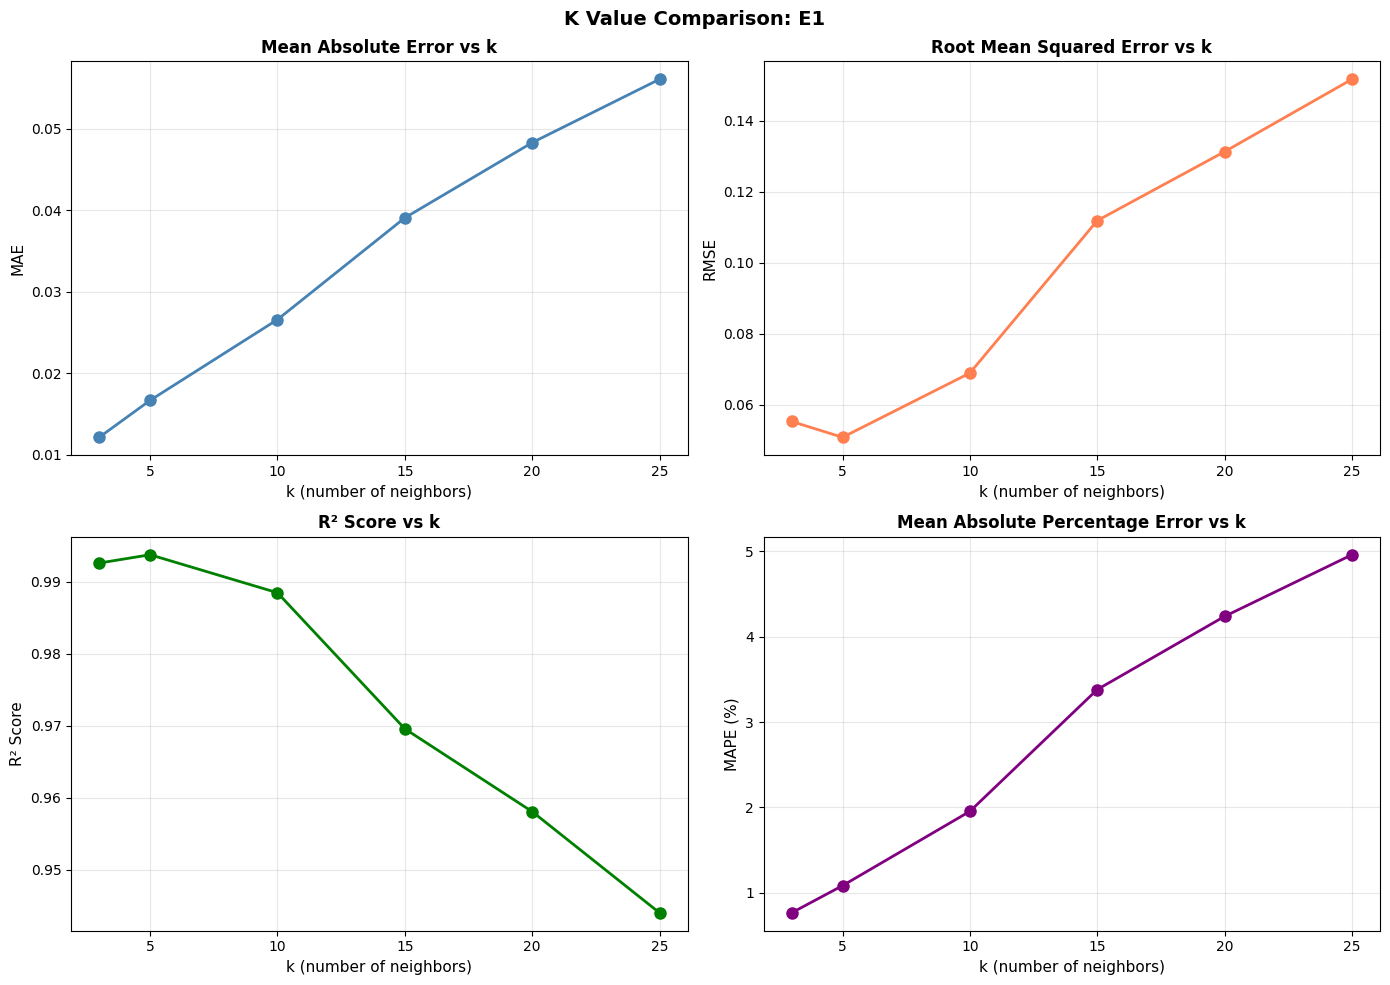


COMPARISON SUMMARY
 k      mae     rmse       r2     mape
 3 0.012147 0.055240 0.992579 0.766313
 5 0.016683 0.050761 0.993734 1.084614
10 0.026594 0.068895 0.988457 1.955000
15 0.039080 0.111864 0.969569 3.381034
20 0.048310 0.131309 0.958070 4.237896
25 0.056086 0.151723 0.944020 4.959478
Best k by MAE:  3
Best k by RMSE: 5
Best k by R²:   5

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'E20'
Masked 737 values (10.0% of non-NaN values)

Imputing column: 'E20'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.021318

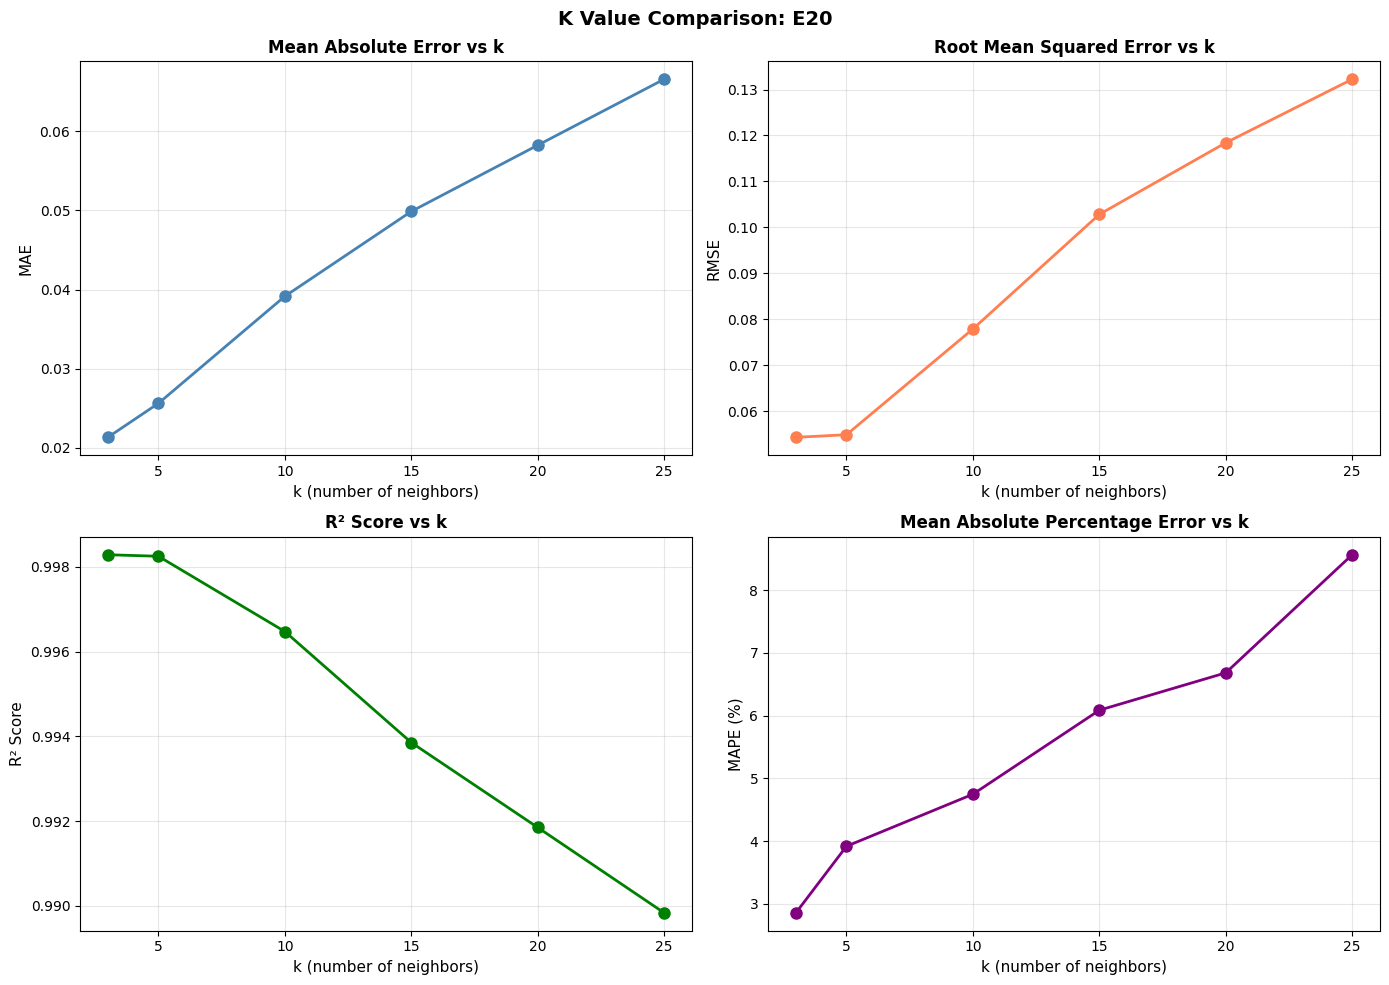


COMPARISON SUMMARY
 k      mae     rmse       r2     mape
 3 0.021318 0.054291 0.998287 2.855535
 5 0.025615 0.054854 0.998251 3.916939
10 0.039144 0.077878 0.996475 4.746734
15 0.049872 0.102824 0.993855 6.086727
20 0.058241 0.118411 0.991850 6.682762
25 0.066583 0.132241 0.989835 8.565994
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'E7'
Masked 202 values (10.0% of non-NaN values)

Imputing column: 'E7'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.124075


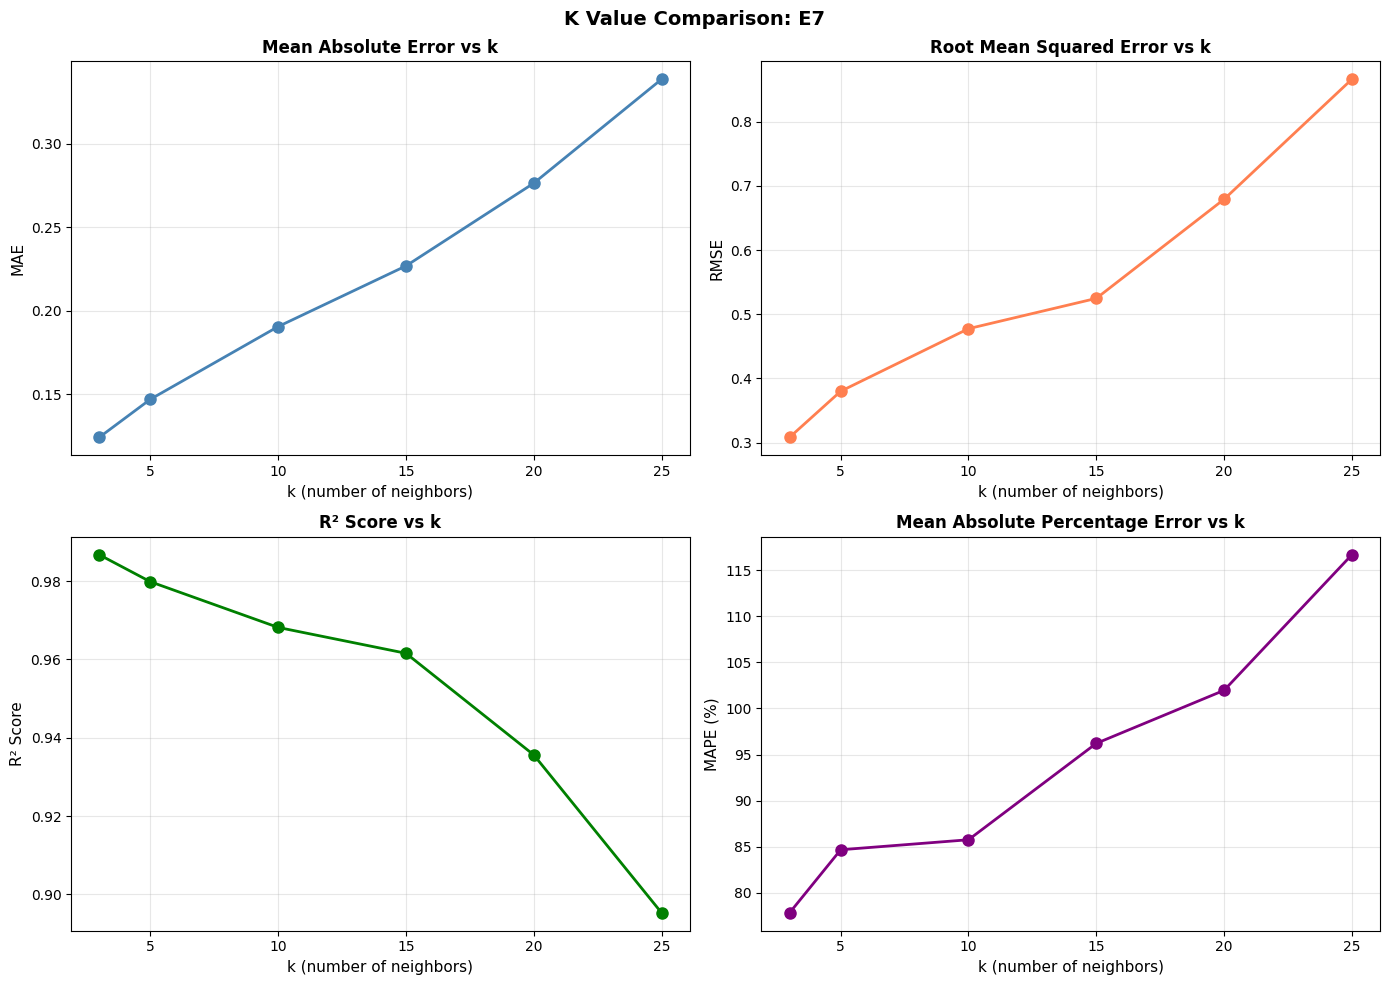


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.124075 0.308302 0.986735  77.851634
 5 0.146868 0.380079 0.979840  84.686938
10 0.190427 0.477551 0.968174  85.771382
15 0.226749 0.524759 0.961571  96.218908
20 0.276318 0.679199 0.935622 101.967467
25 0.338583 0.866157 0.895303 116.664965
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M1'
Masked 344 values (10.0% of non-NaN values)

Imputing column: 'M1'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

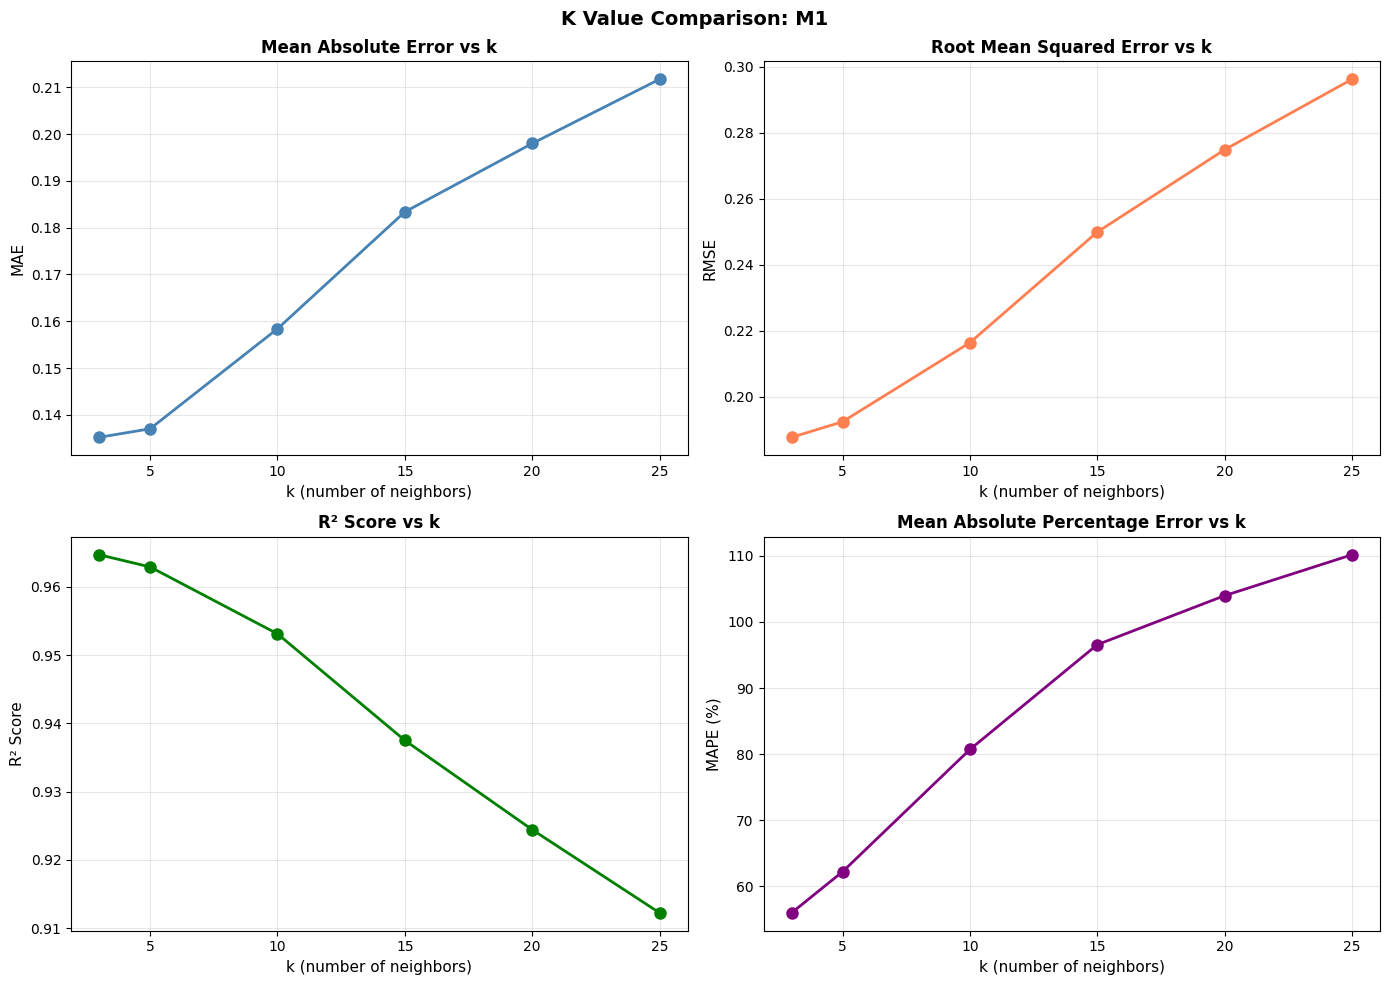


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.135217 0.187765 0.964722  55.967531
 5 0.137044 0.192472 0.962931  62.186956
10 0.158397 0.216427 0.953130  80.696481
15 0.183365 0.249898 0.937512  96.561795
20 0.197978 0.274824 0.924424 103.986158
25 0.211702 0.296152 0.912238 110.177332
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M13'
Masked 345 values (10.0% of non-NaN values)

Imputing column: 'M13'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):     

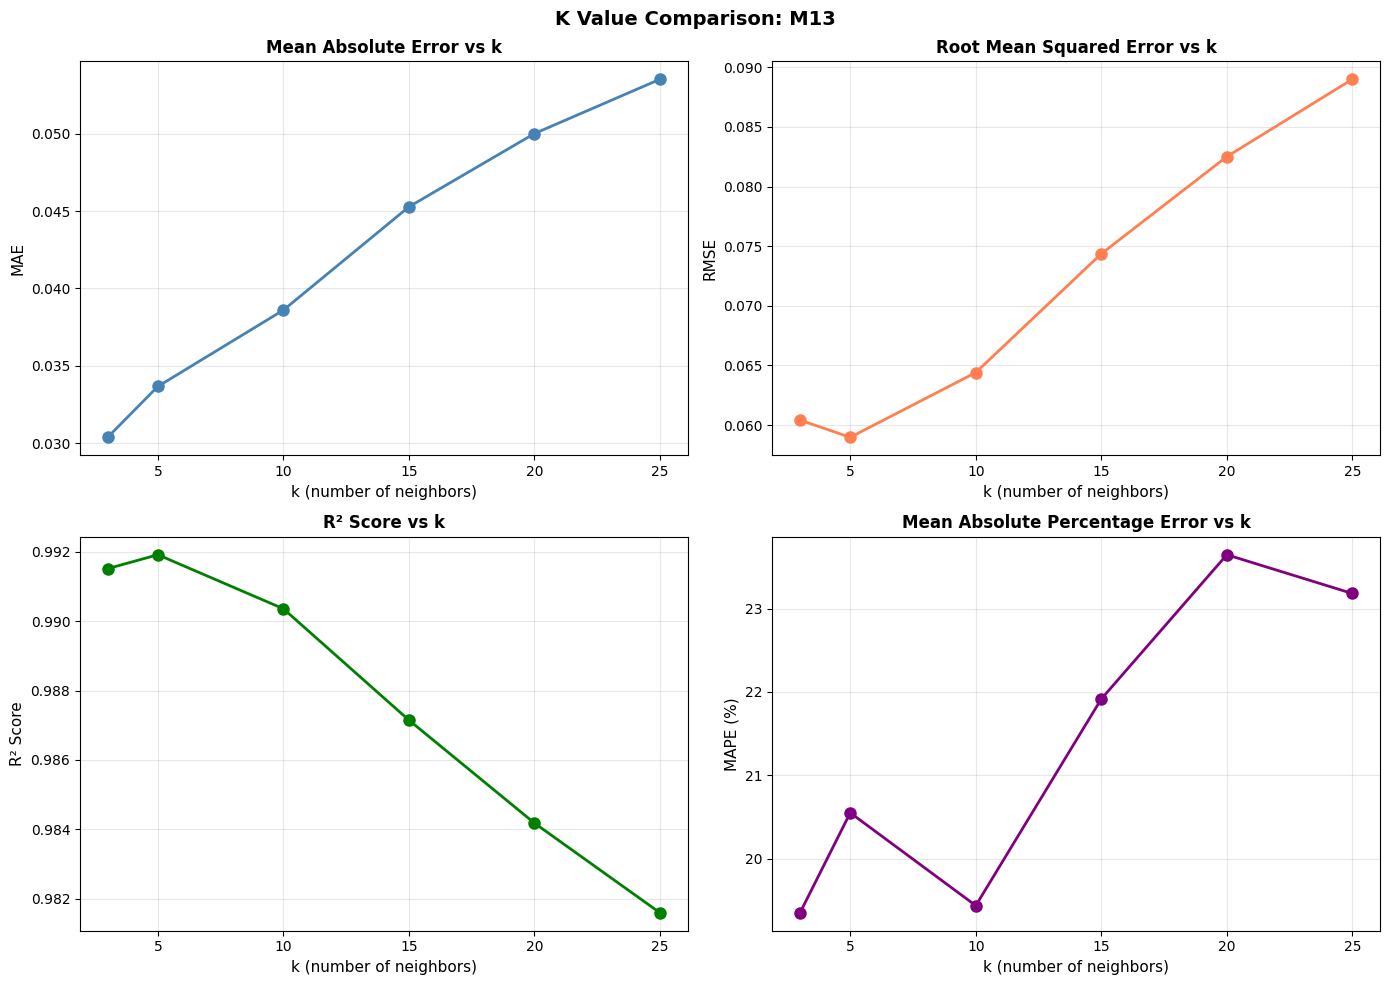


COMPARISON SUMMARY
 k      mae     rmse       r2      mape
 3 0.030371 0.060417 0.991516 19.348115
 5 0.033660 0.058970 0.991918 20.549444
10 0.038595 0.064404 0.990360 19.434791
15 0.045272 0.074364 0.987147 21.916203
20 0.050007 0.082509 0.984177 23.648192
25 0.053518 0.088999 0.981591 23.182733
Best k by MAE:  3
Best k by RMSE: 5
Best k by R²:   5

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M14'
Masked 345 values (10.0% of non-NaN values)

Imputing column: 'M14'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0

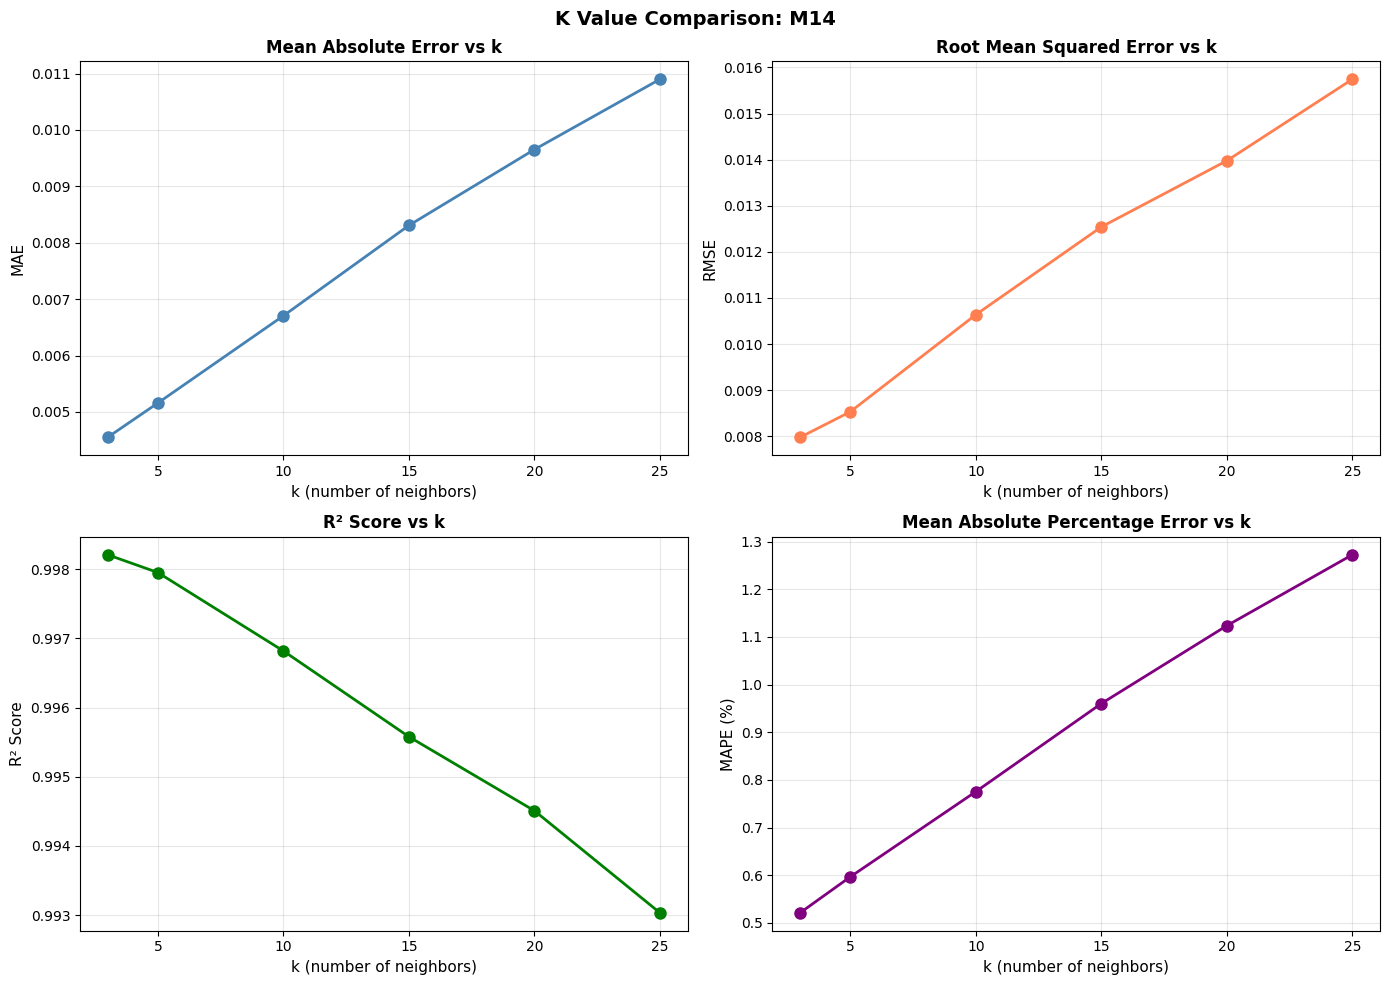


COMPARISON SUMMARY
 k      mae     rmse       r2     mape
 3 0.004550 0.007978 0.998211 0.521022
 5 0.005159 0.008532 0.997954 0.596511
10 0.006705 0.010637 0.996820 0.775348
15 0.008308 0.012541 0.995579 0.960219
20 0.009654 0.013977 0.994509 1.123715
25 0.010900 0.015744 0.993033 1.272569
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M2'
Masked 577 values (10.0% of non-NaN values)

Imputing column: 'M2'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.906041


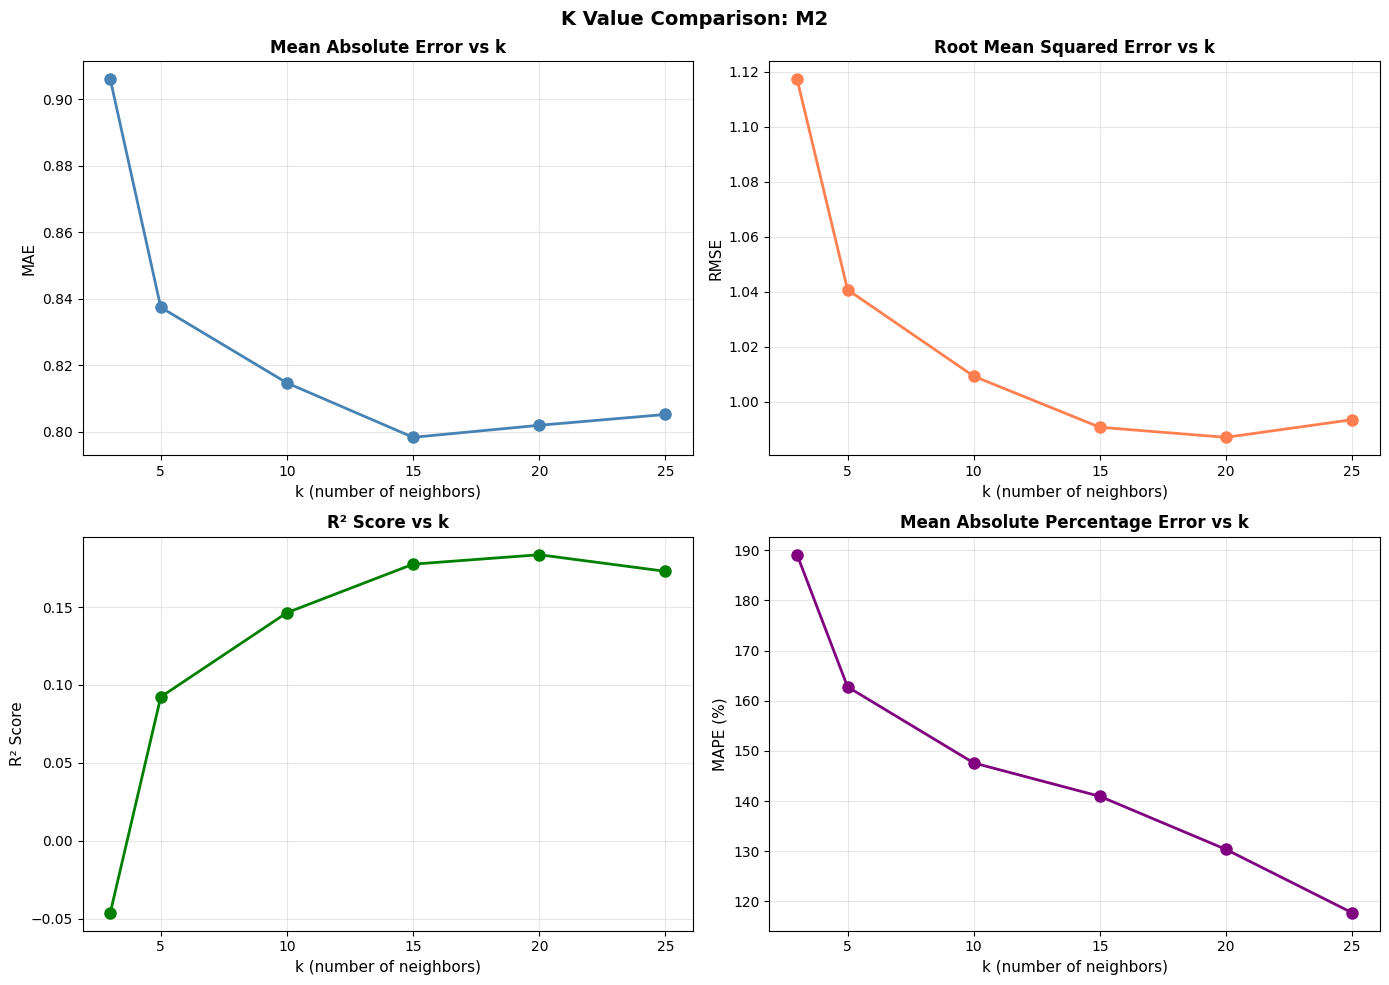


COMPARISON SUMMARY
 k      mae     rmse        r2       mape
 3 0.906041 1.117326 -0.046229 189.109906
 5 0.837430 1.040735  0.092289 162.778338
10 0.814690 1.009272  0.146343 147.611917
15 0.798330 0.990688  0.177491 140.957904
20 0.801952 0.987037  0.183541 130.368595
25 0.805206 0.993450  0.172898 117.739634
Best k by MAE:  15
Best k by RMSE: 20
Best k by R²:   20

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M3'
Masked 697 values (10.0% of non-NaN values)

Imputing column: 'M3'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (M

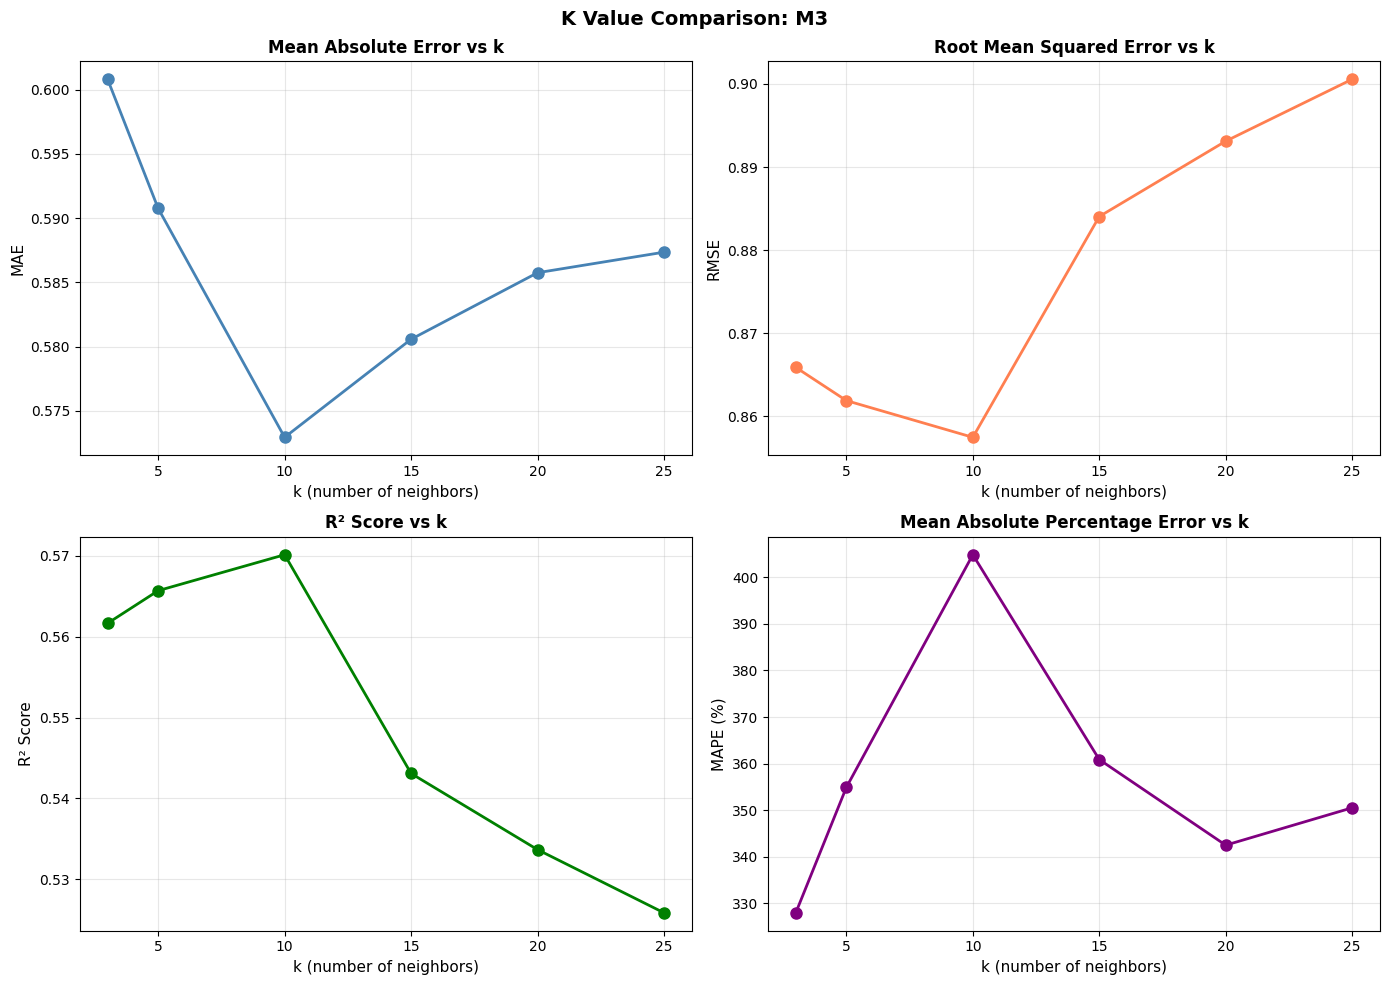


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.600804 0.865875 0.561660 327.976249
 5 0.590753 0.861877 0.565698 354.910800
10 0.572945 0.857455 0.570144 404.846064
15 0.580576 0.884040 0.543075 360.877267
20 0.585751 0.893113 0.533648 342.501123
25 0.587350 0.900568 0.525830 350.524786
Best k by MAE:  10
Best k by RMSE: 10
Best k by R²:   10

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M5'
Masked 570 values (10.0% of non-NaN values)

Imputing column: 'M5'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):   

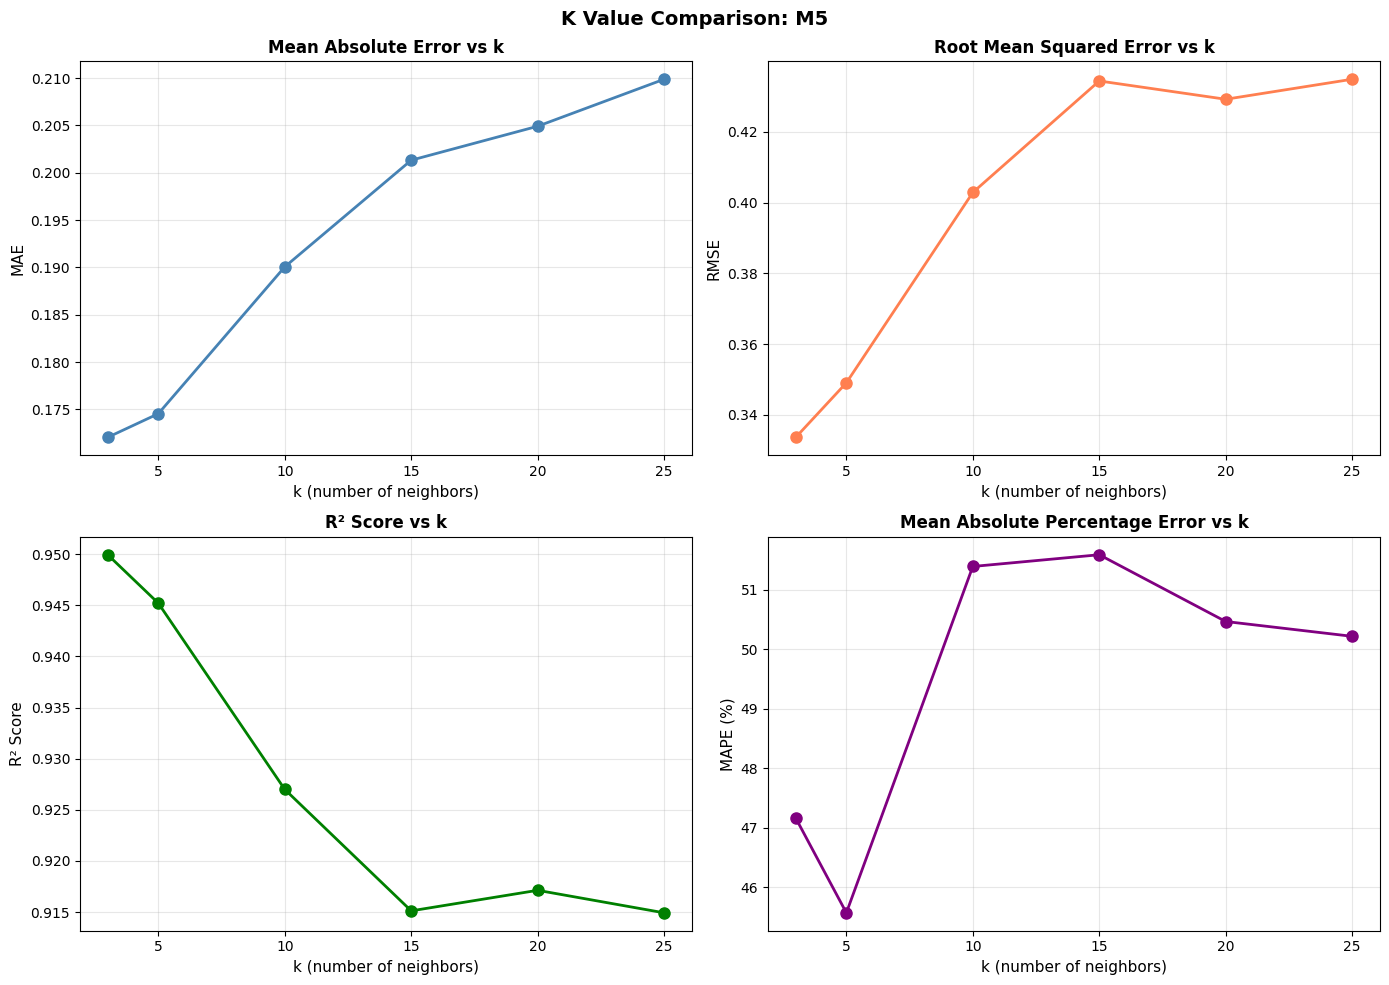


COMPARISON SUMMARY
 k      mae     rmse       r2      mape
 3 0.172044 0.333633 0.949933 47.159379
 5 0.174537 0.349049 0.945199 45.569649
10 0.190053 0.402861 0.926999 51.387596
15 0.201319 0.434389 0.915127 51.584584
20 0.204908 0.429218 0.917135 50.463006
25 0.209874 0.434879 0.914935 50.214102
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'M6'
Masked 394 values (10.0% of non-NaN values)

Imputing column: 'M6'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.

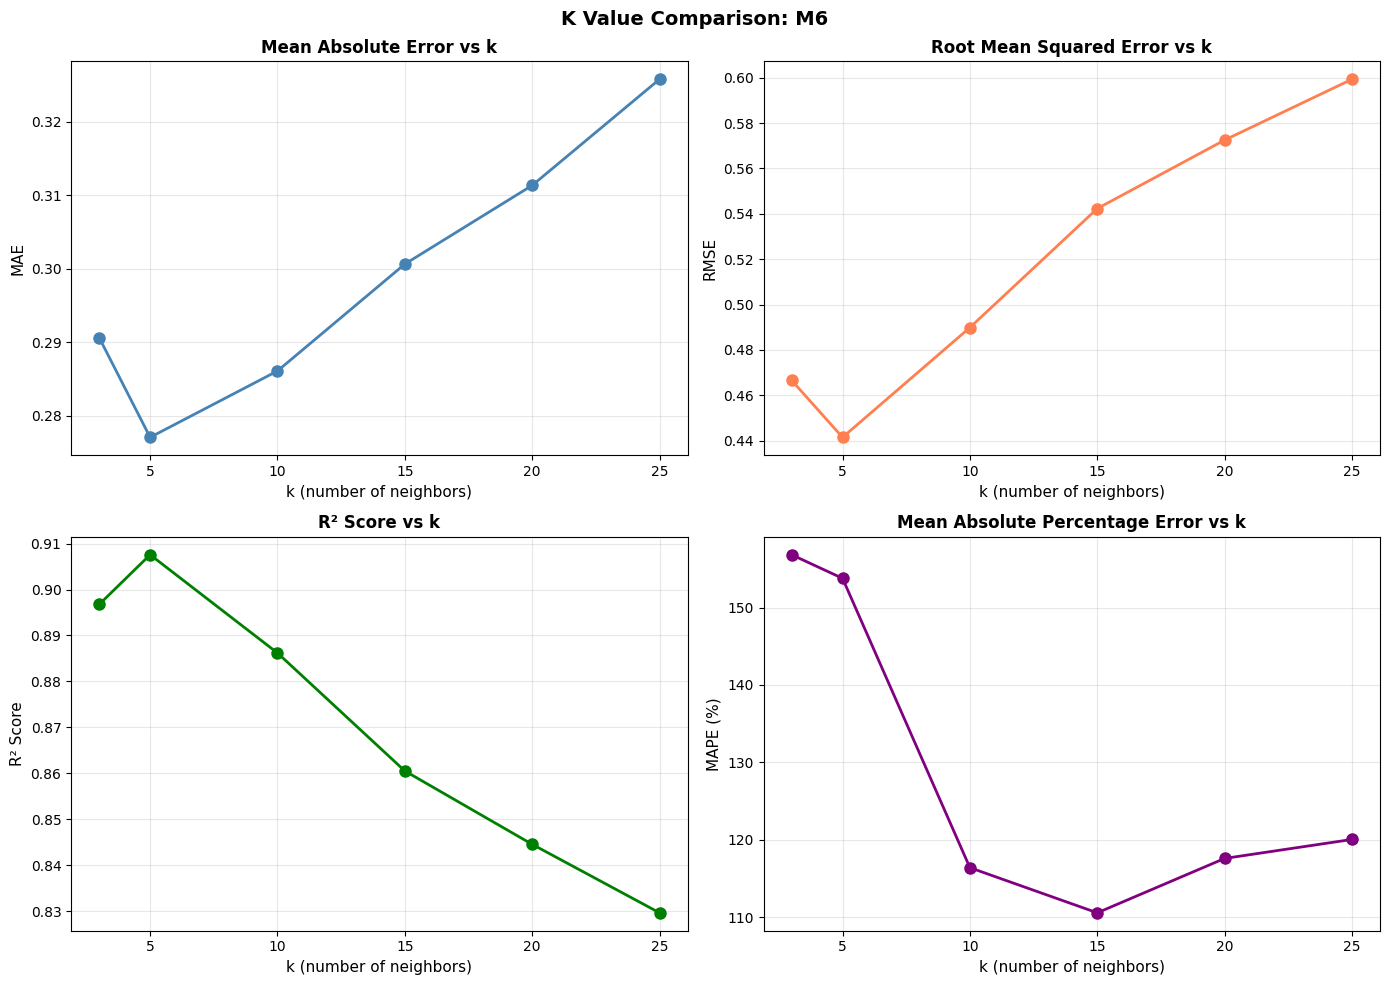


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.290636 0.466572 0.896753 156.822795
 5 0.277089 0.441441 0.907576 153.772456
10 0.286106 0.489852 0.886193 116.376662
15 0.300628 0.542316 0.860510 110.542278
20 0.311322 0.572528 0.844535 117.571509
25 0.325744 0.599350 0.829627 120.024340
Best k by MAE:  5
Best k by RMSE: 5
Best k by R²:   5

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'P5'
Masked 741 values (10.0% of non-NaN values)

Imputing column: 'P5'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

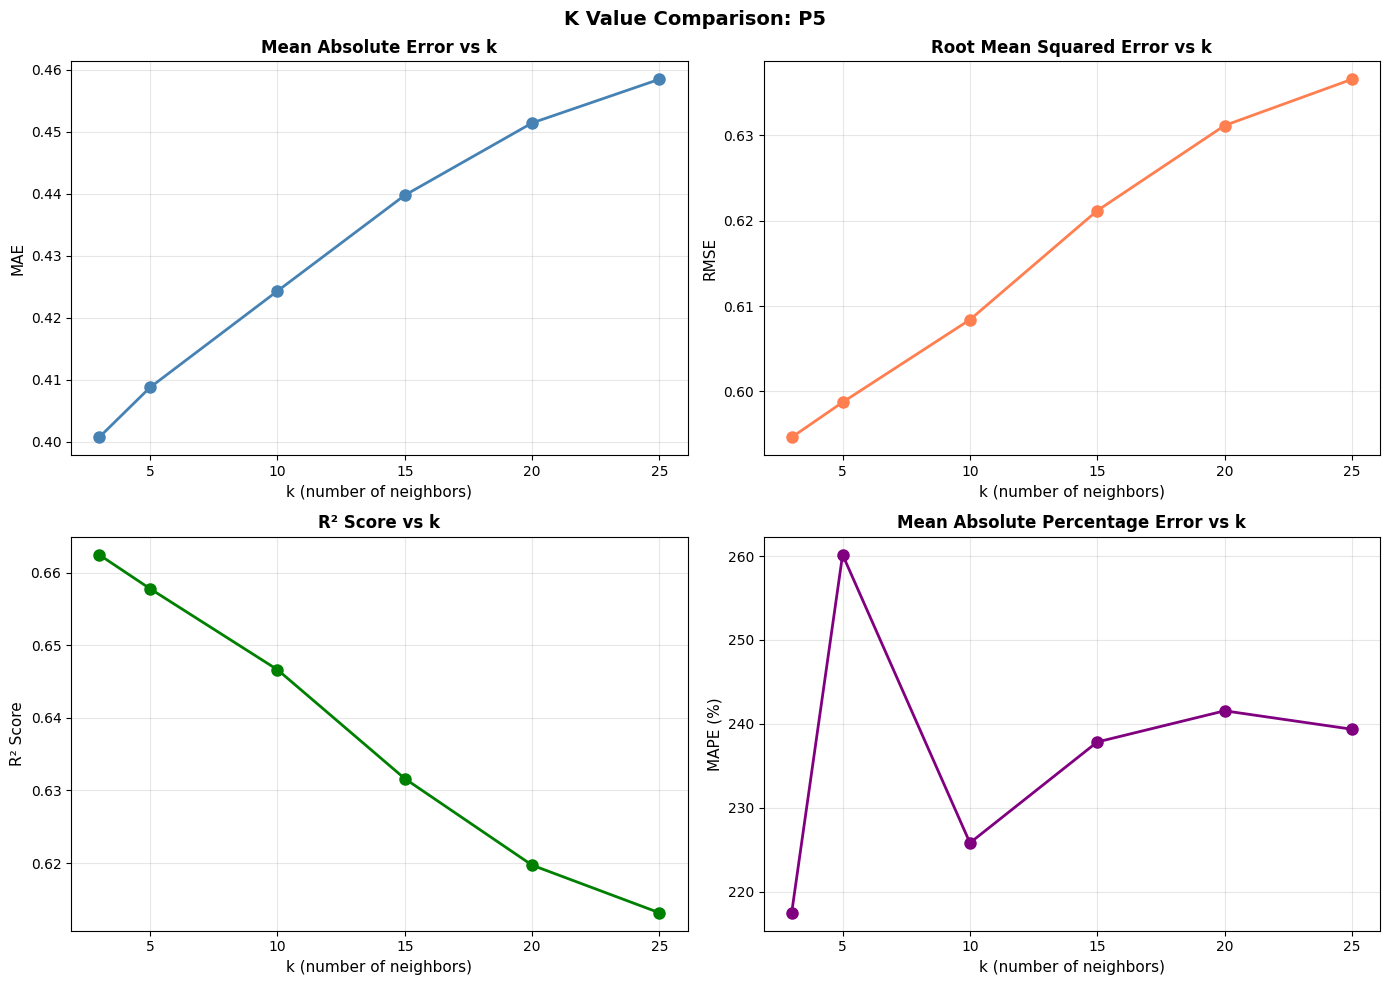


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.400682 0.594628 0.662456 217.489745
 5 0.408740 0.598734 0.657777 260.153455
10 0.424285 0.608408 0.646630 225.824476
15 0.439740 0.621184 0.631632 237.844017
20 0.451399 0.631153 0.619715 241.558143
25 0.458450 0.636572 0.613156 239.362083
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'P6'
Masked 735 values (10.0% of non-NaN values)

Imputing column: 'P6'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

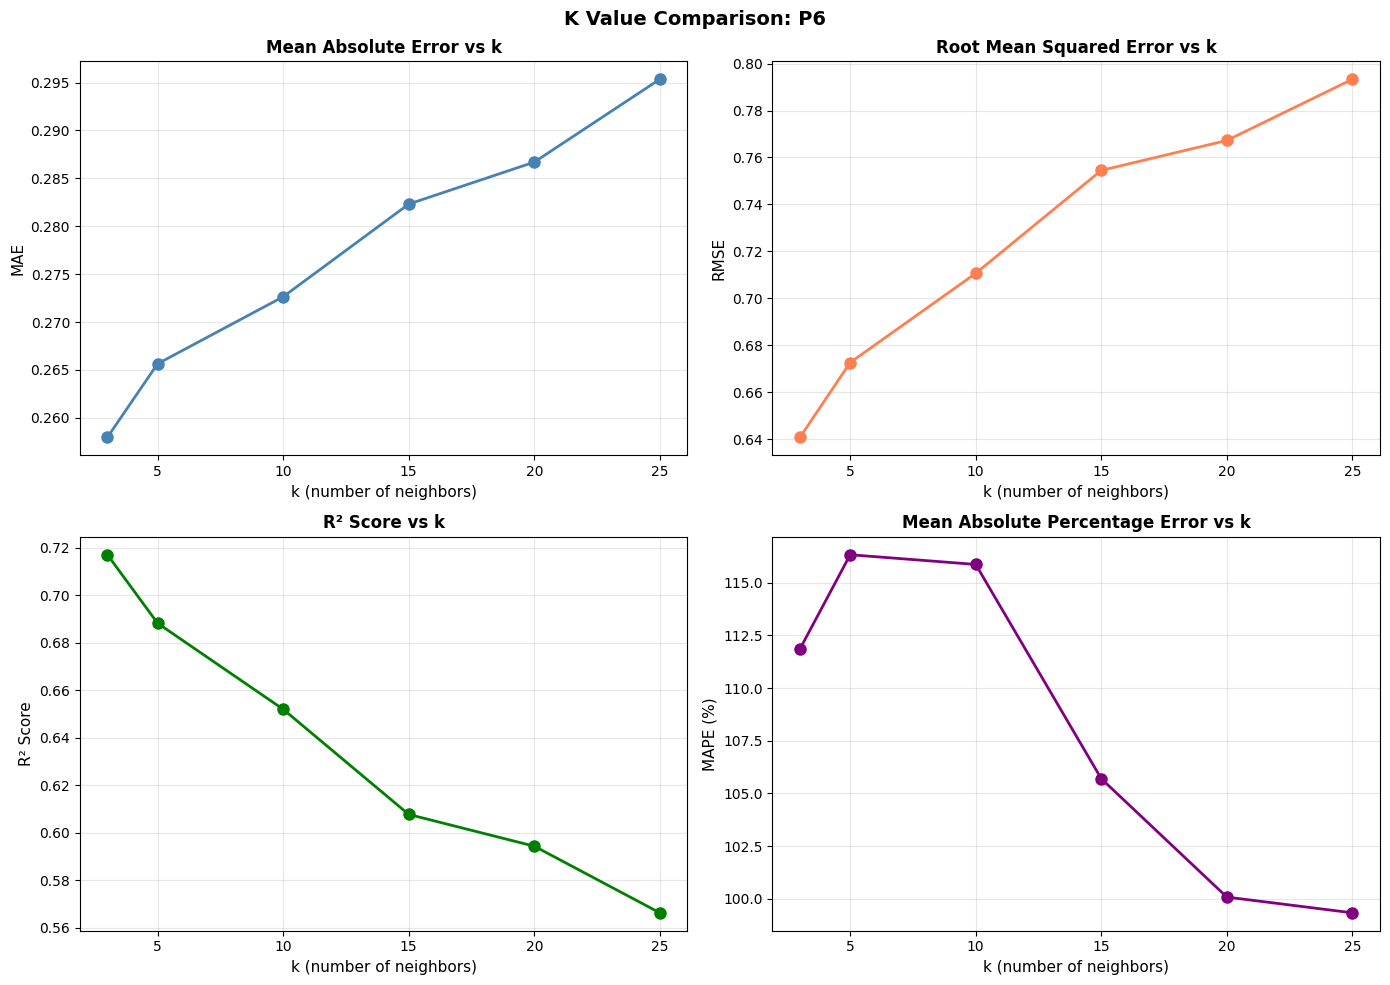


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.257962 0.640739 0.717148 111.856685
 5 0.265642 0.672615 0.688304 116.330092
10 0.272639 0.710634 0.652072 115.869443
15 0.282313 0.754498 0.607795 105.698648
20 0.286697 0.767259 0.594415 100.079134
25 0.295350 0.793352 0.566360  99.332069
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'P7'
Masked 737 values (10.0% of non-NaN values)

Imputing column: 'P7'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

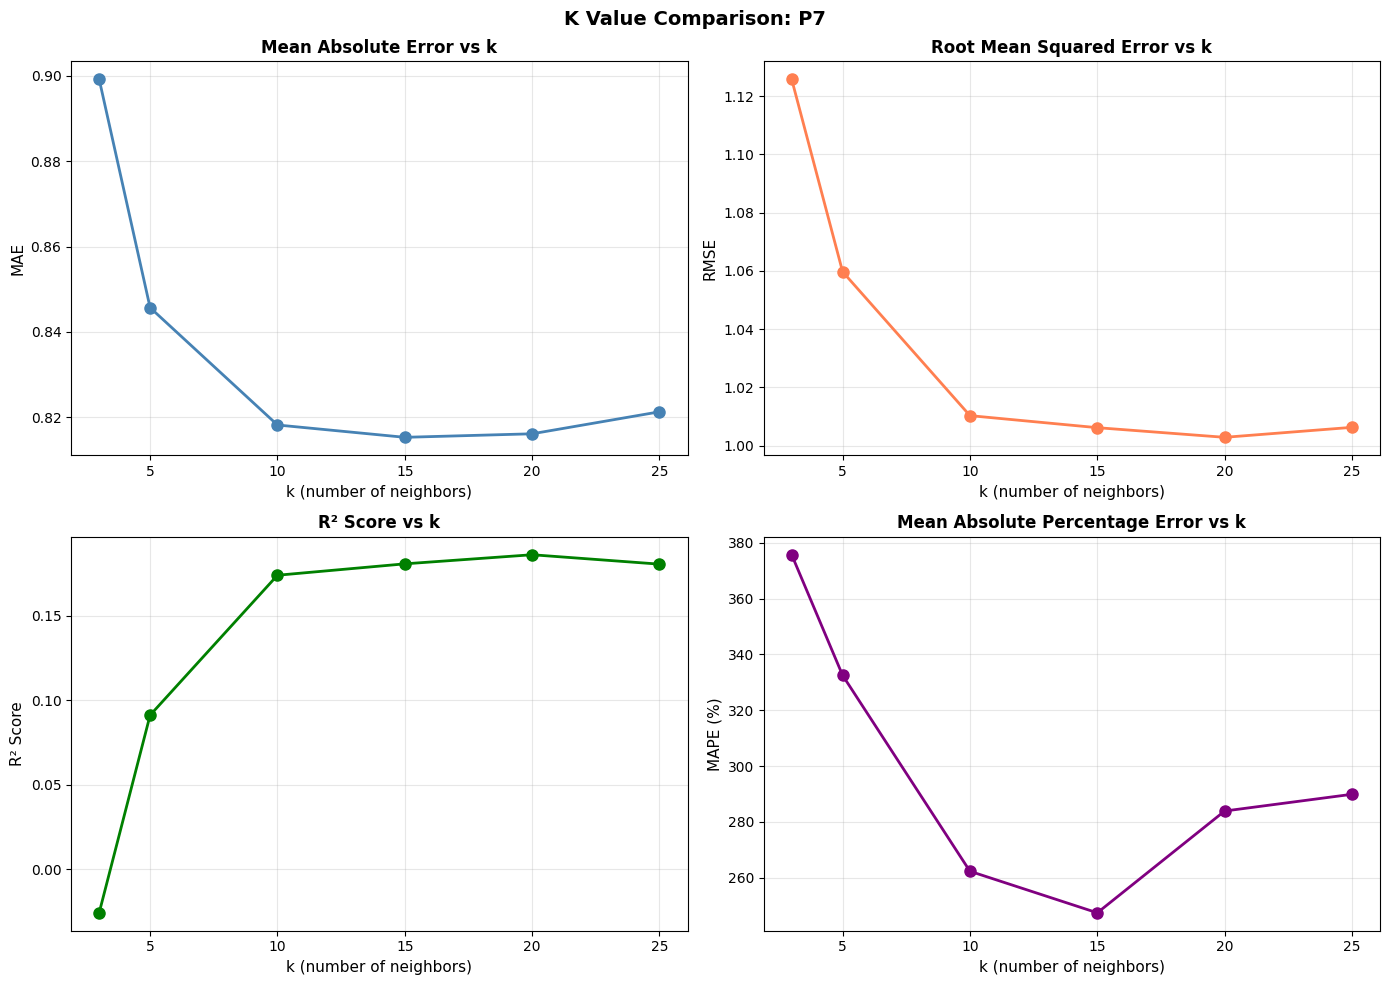


COMPARISON SUMMARY
 k      mae     rmse        r2       mape
 3 0.899222 1.125827 -0.025698 375.686531
 5 0.845687 1.059721  0.091218 332.486159
10 0.818187 1.010303  0.174000 262.289924
15 0.815296 1.006169  0.180747 247.402009
20 0.816123 1.002856  0.186133 283.870774
25 0.821278 1.006281  0.180564 289.866835
Best k by MAE:  15
Best k by RMSE: 20
Best k by R²:   20

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'S12'
Masked 545 values (10.0% of non-NaN values)

Imputing column: 'S12'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (

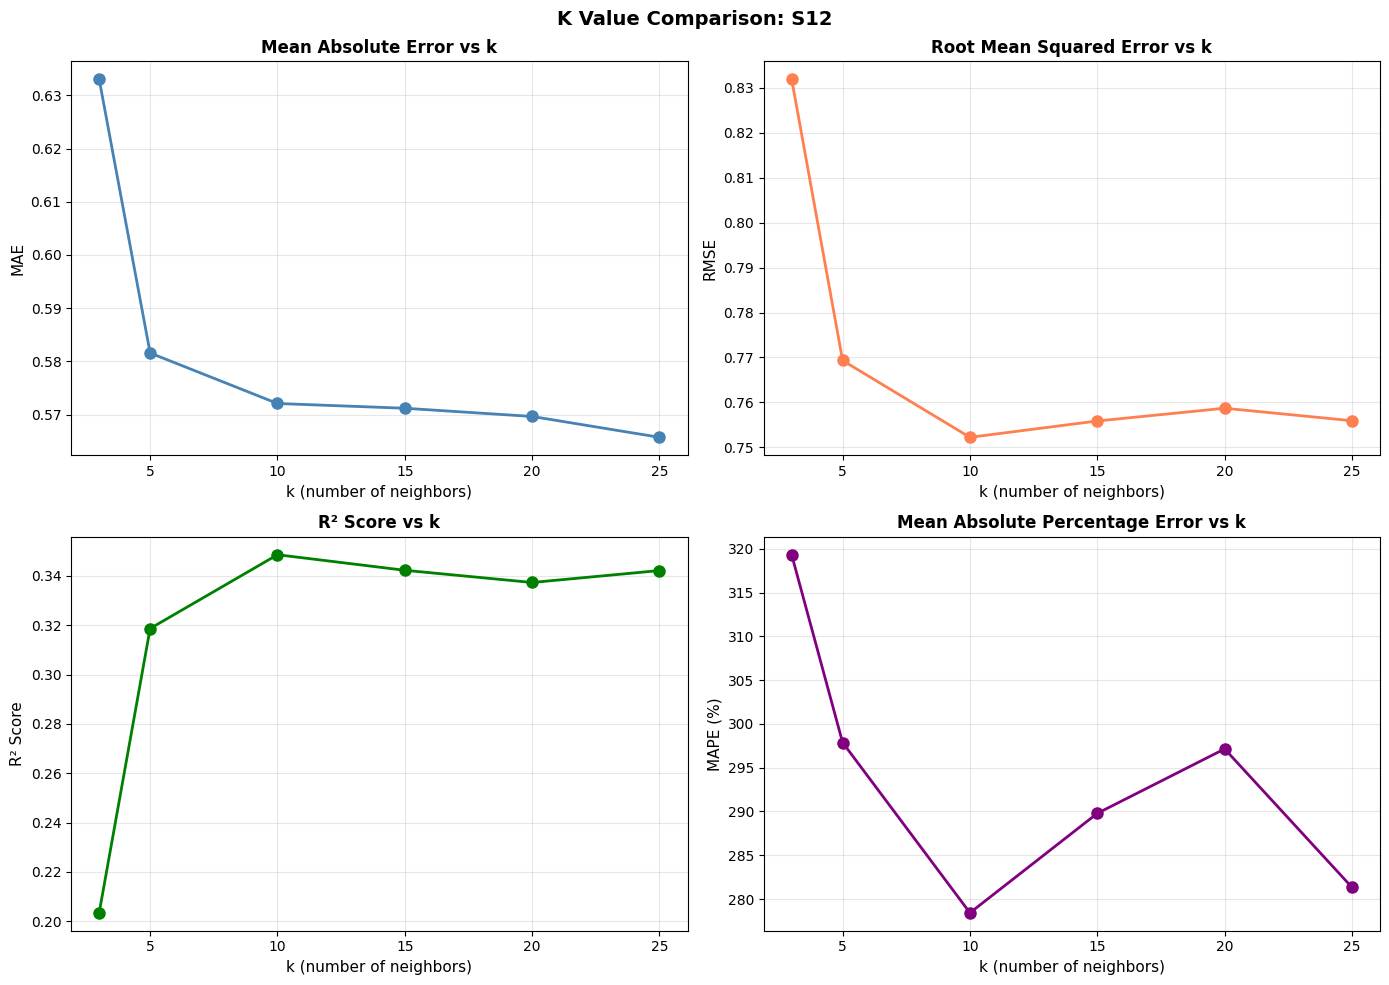


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.633036 0.831867 0.203444 319.331992
 5 0.581573 0.769333 0.318701 297.879889
10 0.572078 0.752253 0.348616 278.423887
15 0.571181 0.755885 0.342312 289.786867
20 0.569639 0.758721 0.337367 297.148914
25 0.565717 0.755946 0.342206 281.335893
Best k by MAE:  25
Best k by RMSE: 10
Best k by R²:   10

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'S3'
Masked 325 values (10.0% of non-NaN values)

Imputing column: 'S3'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):   

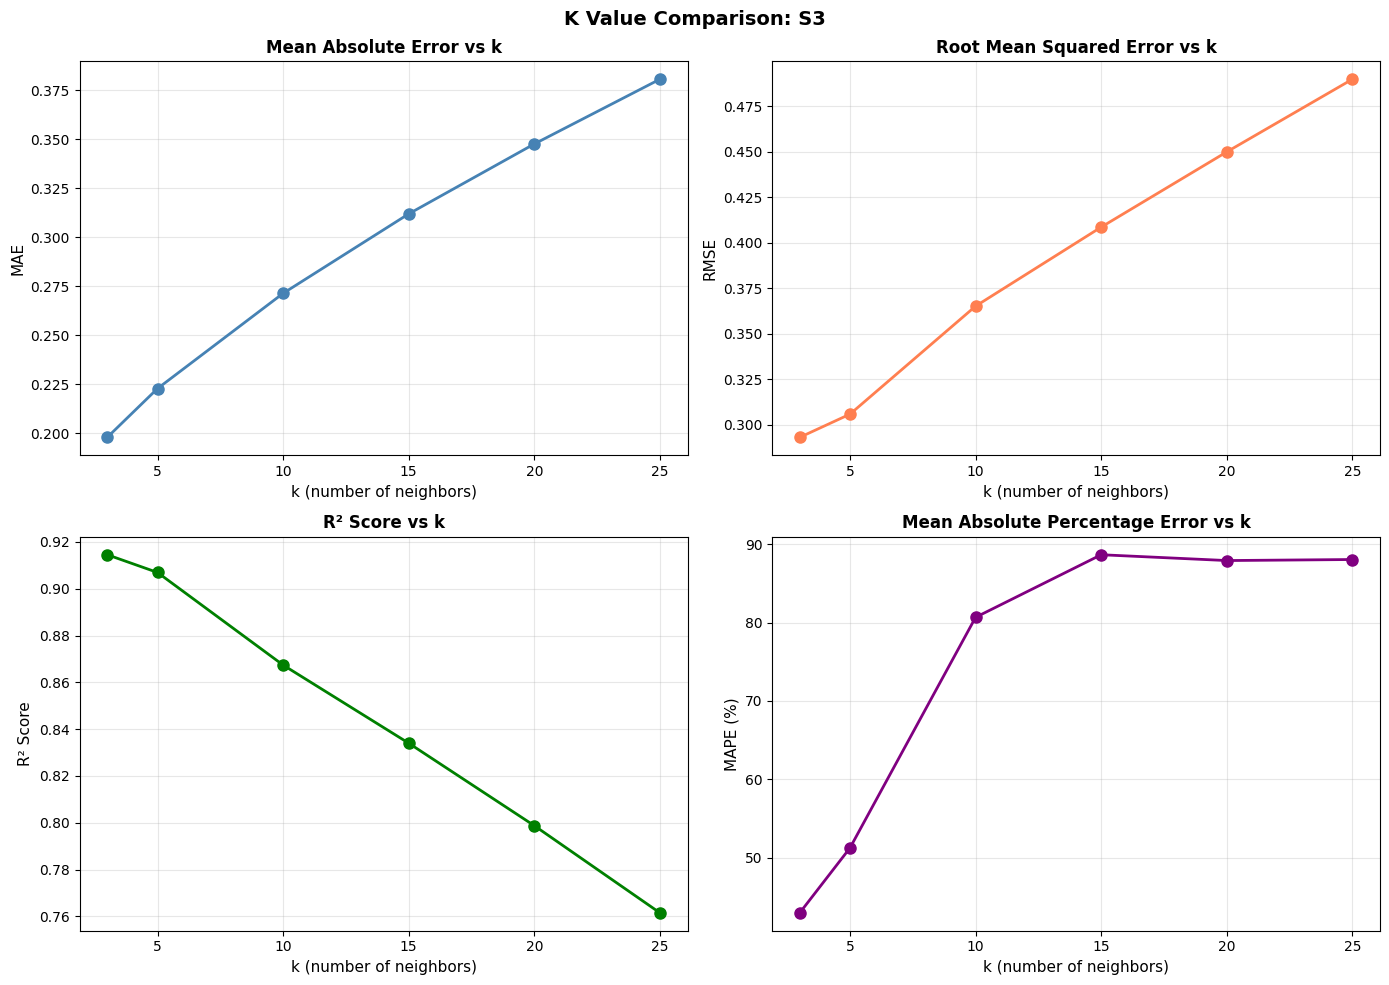


COMPARISON SUMMARY
 k      mae     rmse       r2      mape
 3 0.198024 0.293224 0.914528 42.940918
 5 0.222886 0.305949 0.906948 51.236582
10 0.271414 0.365242 0.867386 80.687906
15 0.311923 0.408634 0.834004 88.678288
20 0.347560 0.449942 0.798748 87.935463
25 0.380553 0.489816 0.761497 88.067704
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'S5'
Masked 747 values (10.0% of non-NaN values)

Imputing column: 'S5'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.

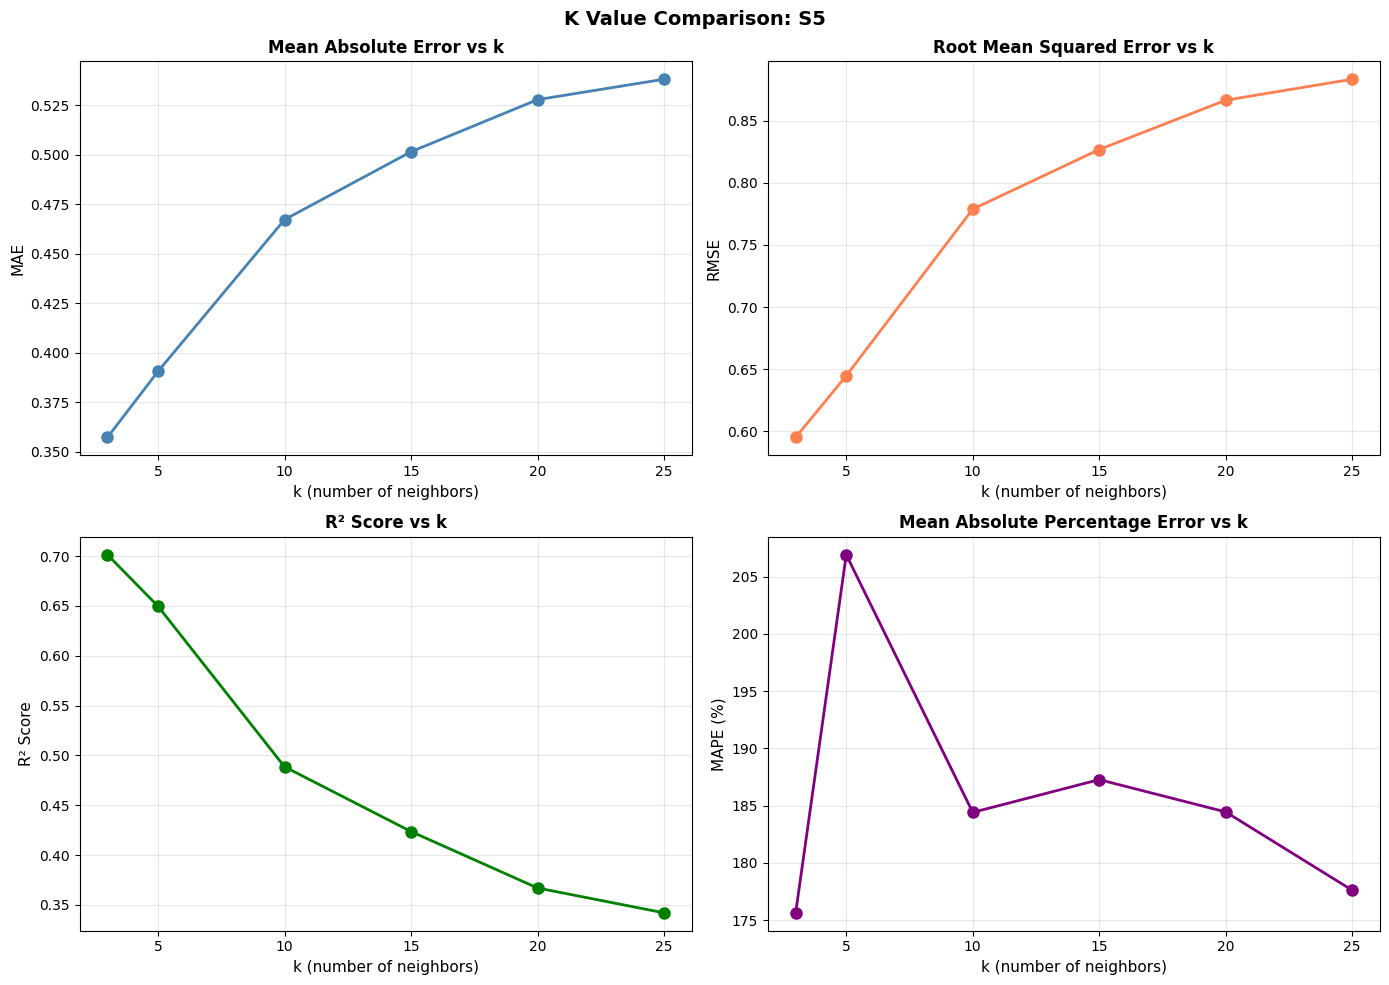


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.357269 0.595157 0.701351 175.633917
 5 0.390579 0.644671 0.649592 206.925447
10 0.467185 0.778801 0.488611 184.410187
15 0.501448 0.826764 0.423682 187.273548
20 0.527757 0.866453 0.367021 184.450228
25 0.538066 0.883333 0.342118 177.609135
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'S8'
Masked 598 values (10.0% of non-NaN values)

Imputing column: 'S8'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

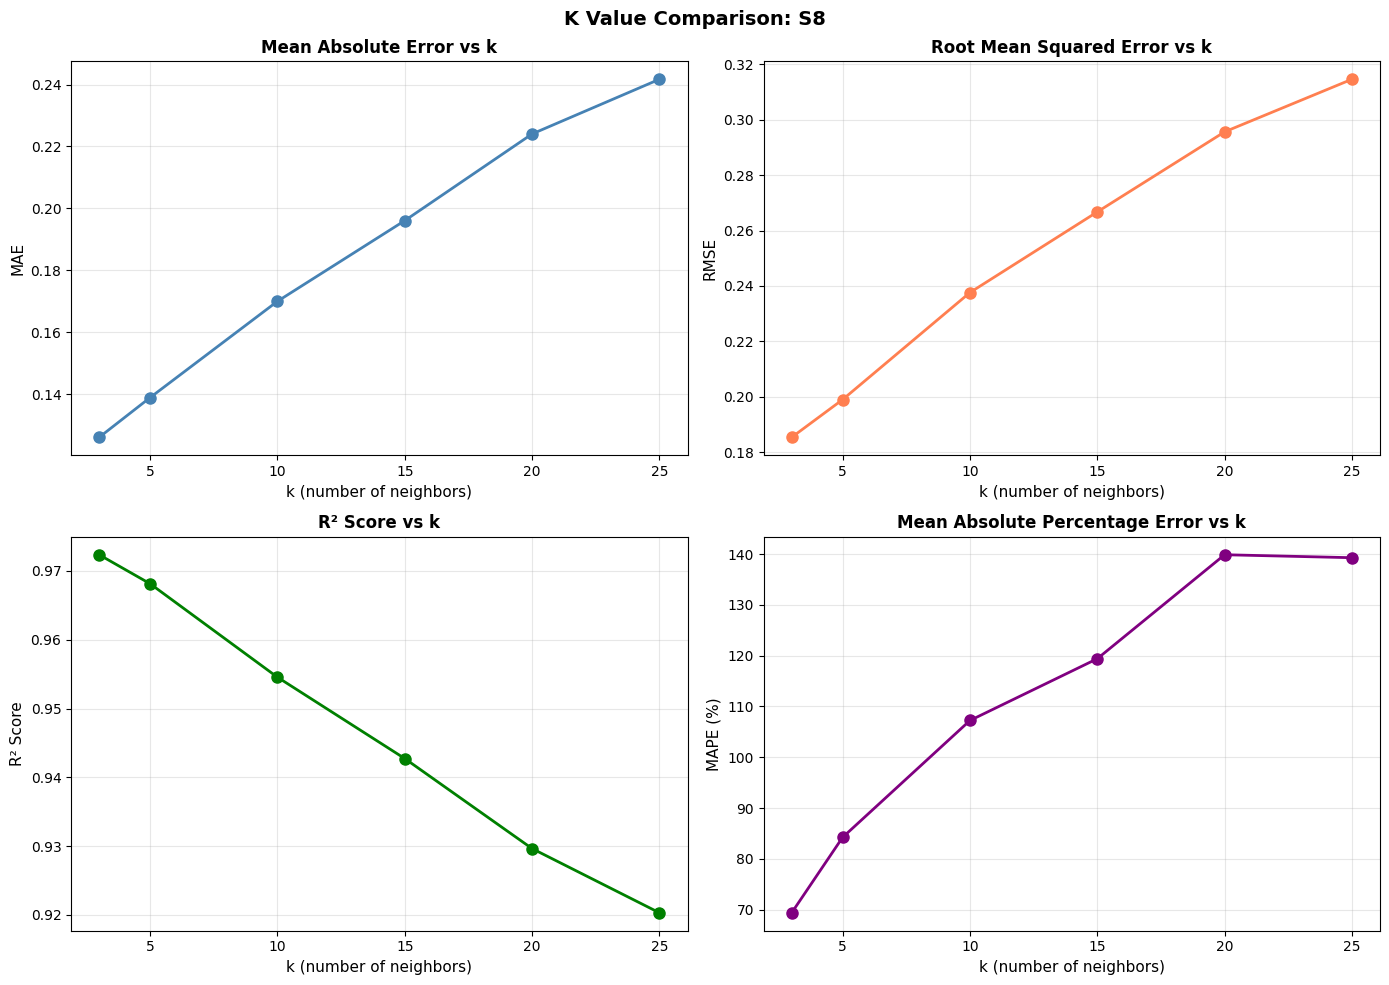


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.126164 0.185345 0.972346  69.373539
 5 0.138988 0.198962 0.968133  84.232276
10 0.170054 0.237617 0.954547 107.244427
15 0.196087 0.266737 0.942724 119.410040
20 0.224057 0.295642 0.929638 139.883153
25 0.241701 0.314634 0.920308 139.298571
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'V10'
Masked 294 values (10.0% of non-NaN values)

Imputing column: 'V10'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V13': 1511, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):     

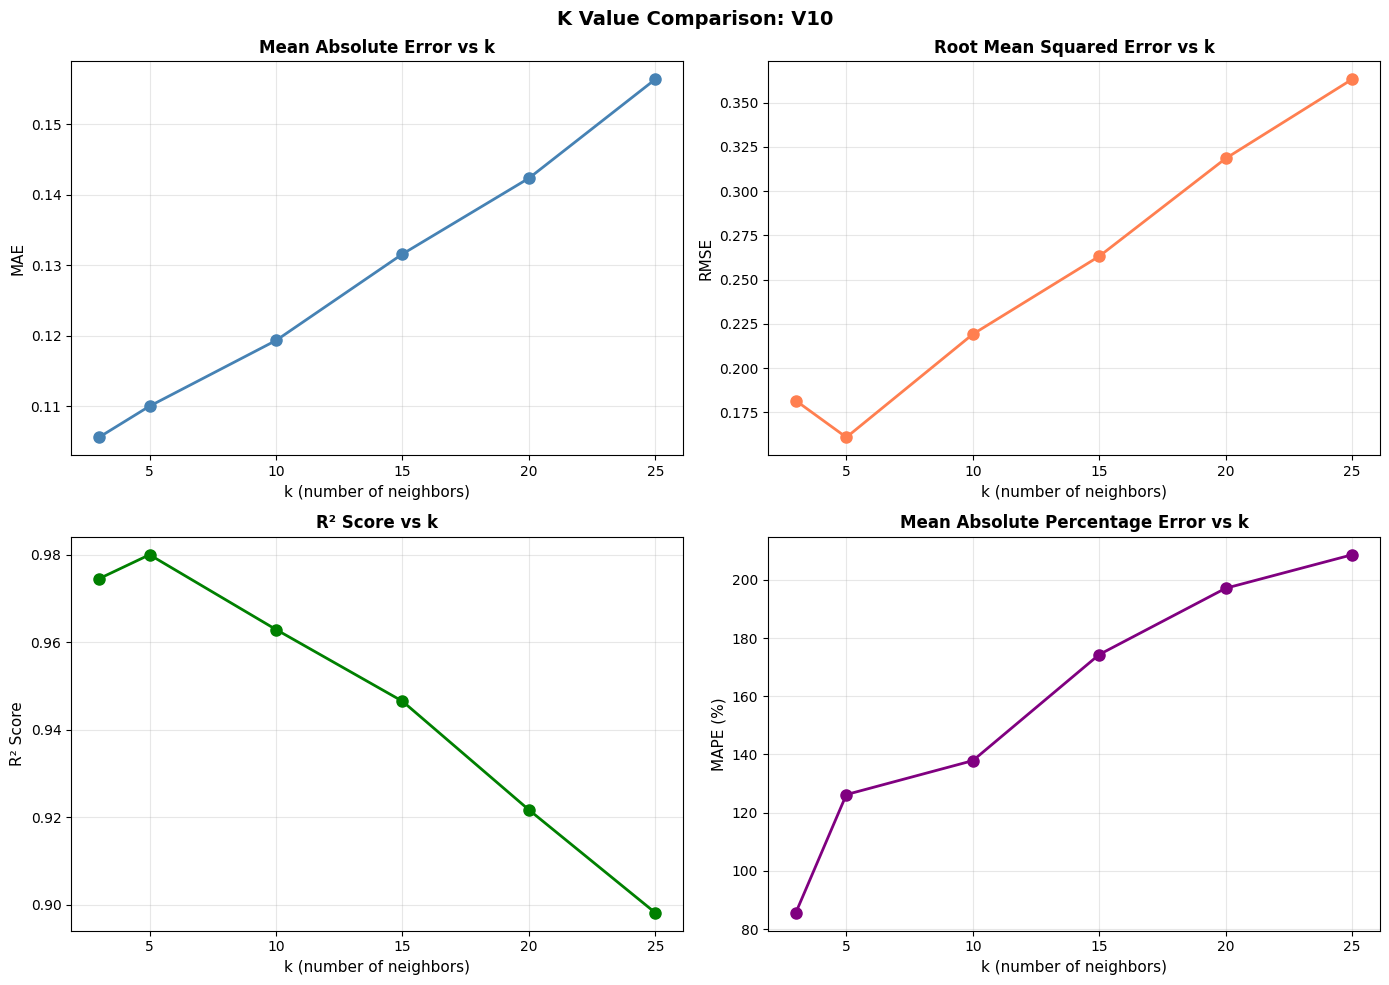


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.105588 0.181645 0.974546  85.572337
 5 0.110009 0.160907 0.980026 126.221336
10 0.119332 0.219182 0.962939 137.889343
15 0.131599 0.263238 0.946543 174.368604
20 0.142361 0.318532 0.921727 197.155827
25 0.156406 0.363273 0.898194 208.670310
Best k by MAE:  3
Best k by RMSE: 5
Best k by R²:   5

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'V13'
Masked 747 values (10.0% of non-NaN values)

Imputing column: 'V13'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V5': 1512, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):     

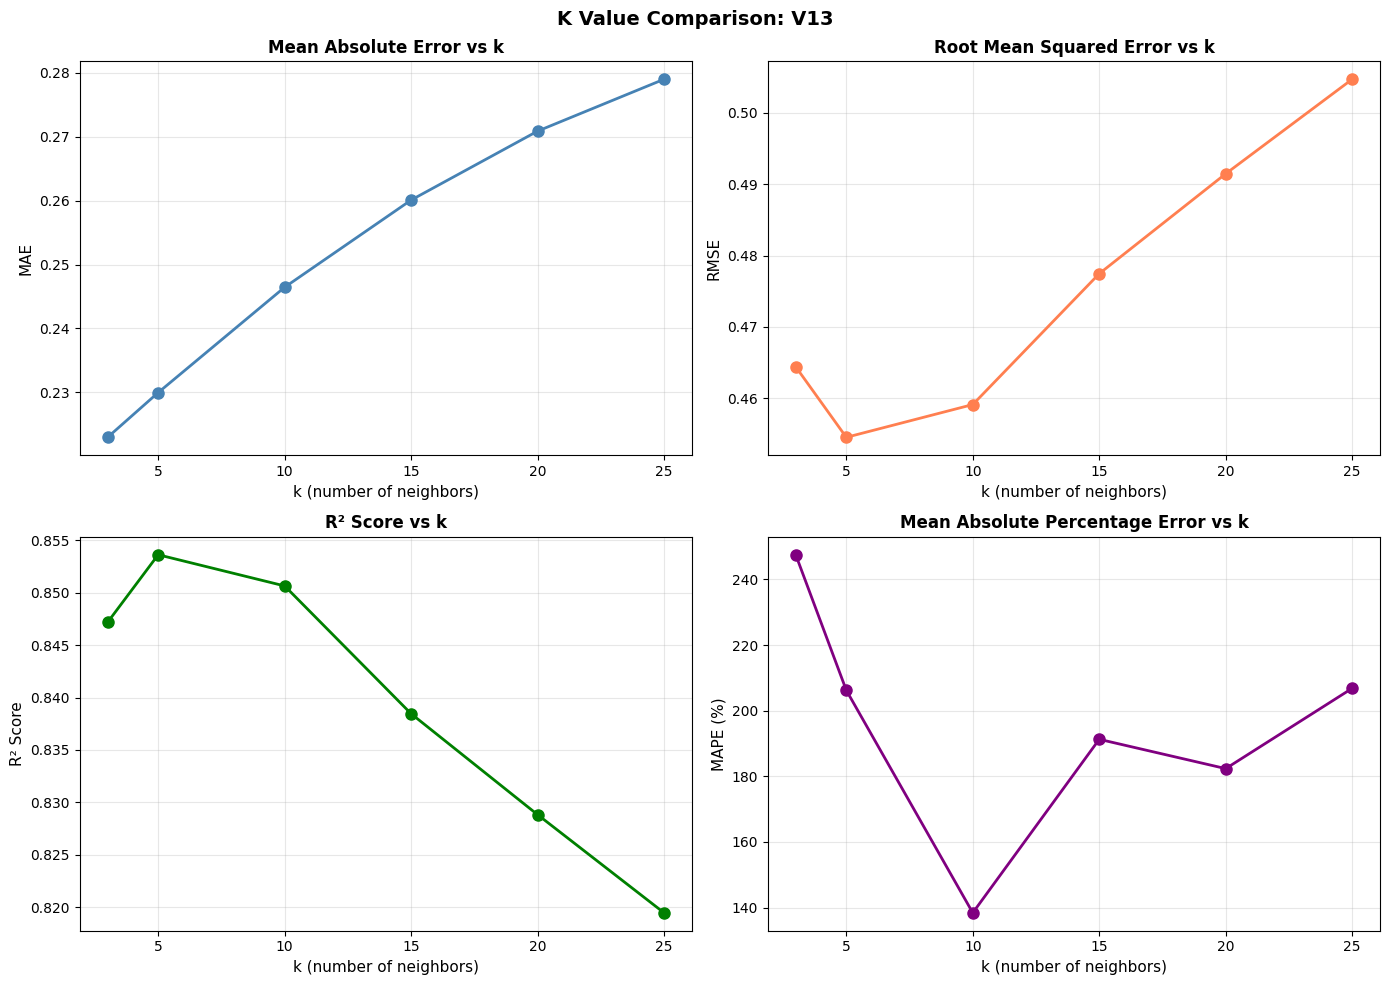


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.222982 0.464390 0.847177 247.514792
 5 0.229979 0.454494 0.853621 206.207272
10 0.246450 0.459090 0.850645 138.395805
15 0.260083 0.477453 0.838458 191.269464
20 0.270861 0.491471 0.828833 182.338657
25 0.278975 0.504731 0.819473 206.810050
Best k by MAE:  3
Best k by RMSE: 5
Best k by R²:   5

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'V5'
Masked 747 values (10.0% of non-NaN values)

Imputing column: 'V5'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V7': 1511, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

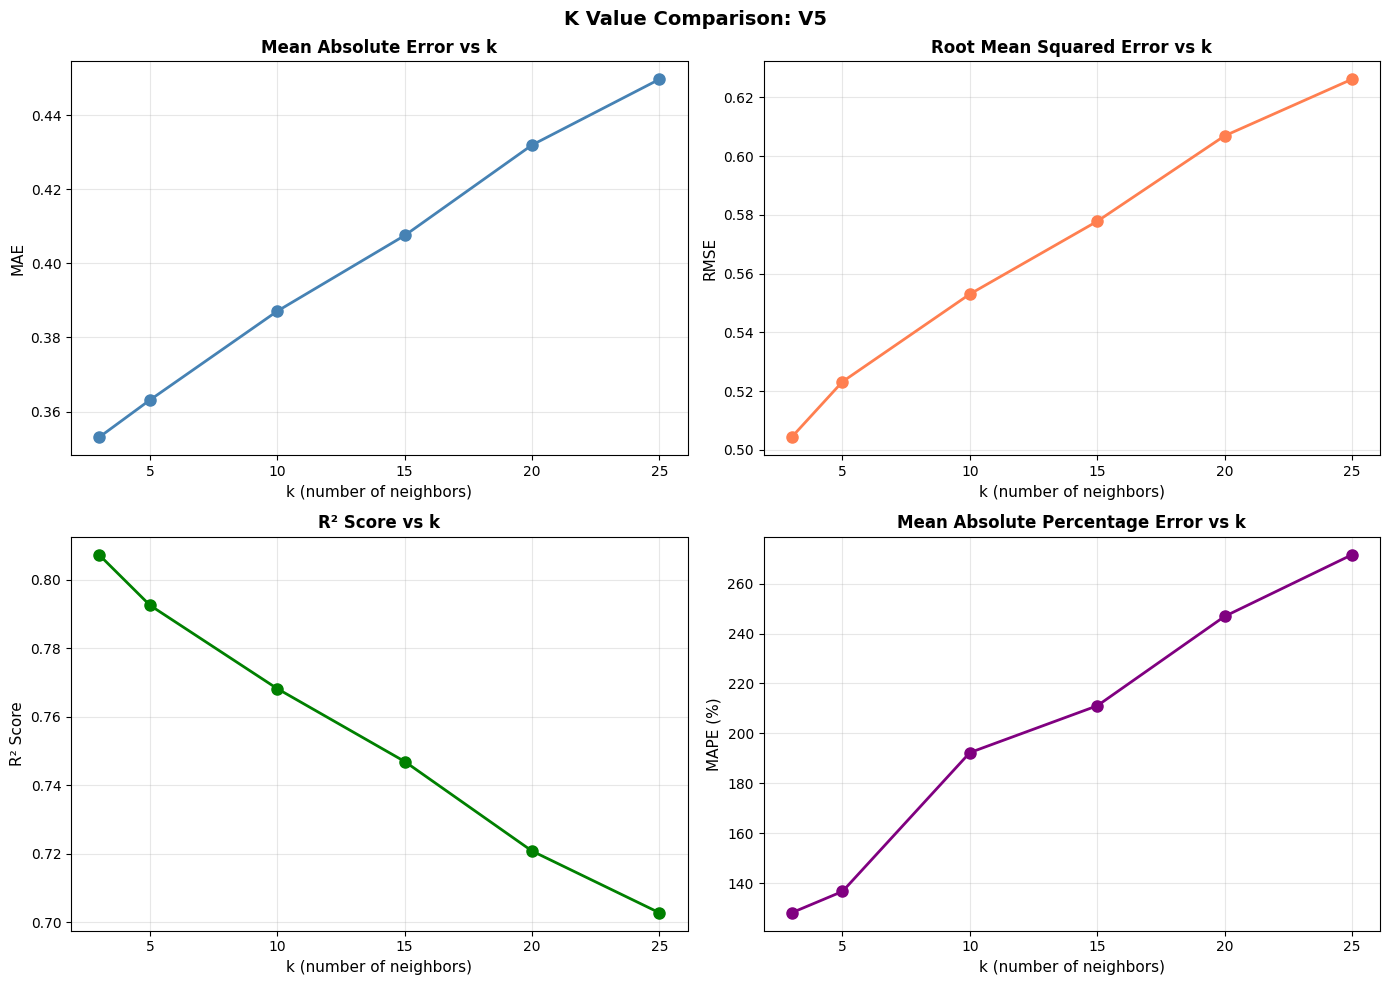


COMPARISON SUMMARY
 k      mae     rmse       r2       mape
 3 0.353033 0.504273 0.807256 128.105414
 5 0.363126 0.523212 0.792507 136.673190
10 0.387138 0.553037 0.768176 192.299397
15 0.407560 0.577815 0.746938 211.056870
20 0.432012 0.606904 0.720817 246.871498
25 0.449765 0.626172 0.702808 271.571392
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'V7'
Masked 747 values (10.0% of non-NaN values)

Imputing column: 'V7'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V9': 4539}

PERFORMANCE METRICS
Mean Absolute Error (MAE):      

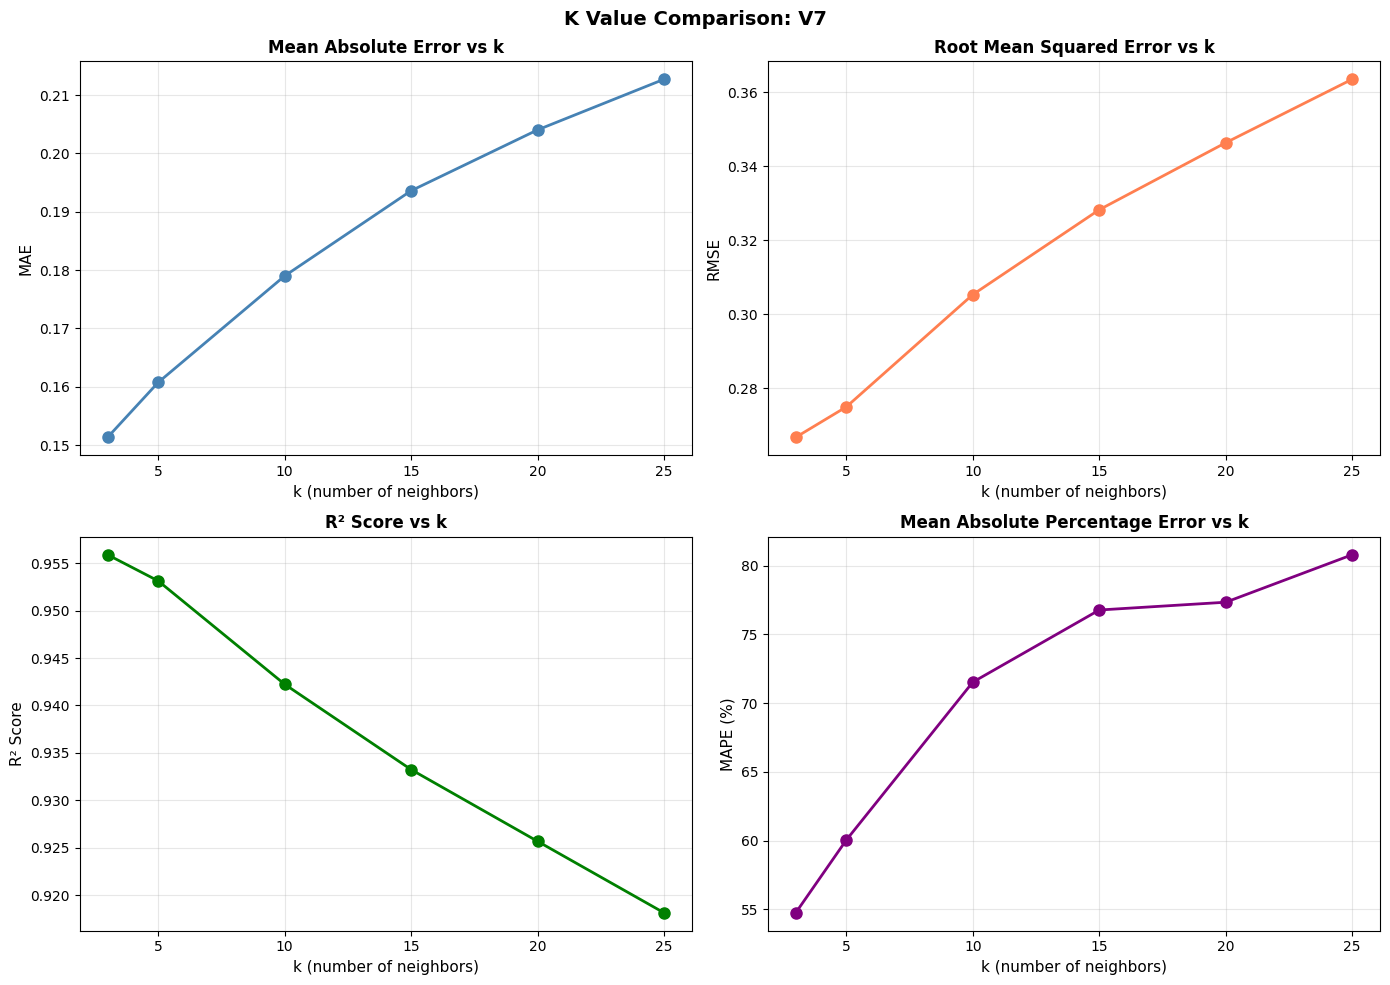


COMPARISON SUMMARY
 k      mae     rmse       r2      mape
 3 0.151348 0.266792 0.955901 54.748909
 5 0.160755 0.275013 0.953141 60.041483
10 0.179003 0.305332 0.942240 71.522508
15 0.193604 0.328260 0.933240 76.768488
20 0.204031 0.346361 0.925674 77.334585
25 0.212710 0.363509 0.918132 80.787721
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3

######################################################################
Testing K = 3
######################################################################

Testing imputation for column: 'V9'
Masked 445 values (10.0% of non-NaN values)

Imputing column: 'V9'
Using 76 columns for distance calculation
Excluded from distance: {'E1': 1784, 'E20': 1616, 'E7': 6969, 'M1': 5547, 'M13': 5540, 'M14': 5540, 'M2': 3217, 'M3': 2018, 'M5': 3283, 'M6': 5043, 'P5': 1574, 'P6': 1638, 'P7': 1616, 'S12': 3537, 'S3': 5733, 'S5': 1511, 'S8': 3009, 'V10': 6049, 'V13': 1511, 'V5': 1512, 'V7': 1511}

PERFORMANCE METRICS
Mean Absolute Error (MAE):           0.

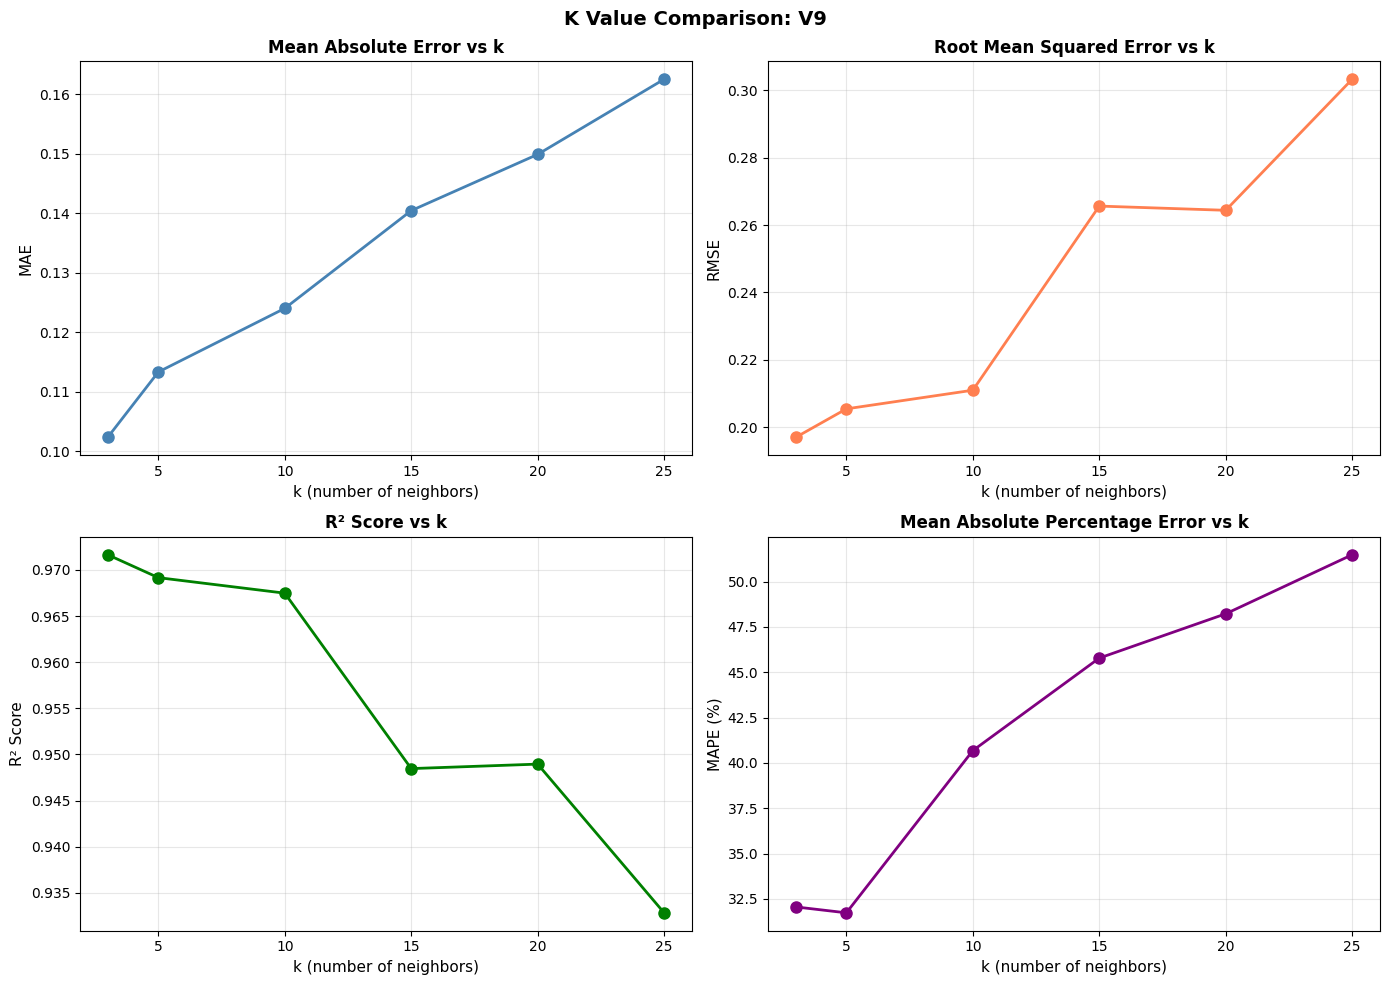


COMPARISON SUMMARY
 k      mae     rmse       r2      mape
 3 0.102319 0.197046 0.971644 32.062158
 5 0.113308 0.205487 0.969163 31.736871
10 0.124009 0.211015 0.967481 40.683716
15 0.140451 0.265623 0.948472 45.785578
20 0.149911 0.264369 0.948958 48.228550
25 0.162552 0.303237 0.932846 51.485197
Best k by MAE:  3
Best k by RMSE: 3
Best k by R²:   3


In [13]:
import pathlib


imputation_results_dict = {}
for col_name in incomplete_dict.keys():
    dict_cp = incomplete_dict.copy()

    missing_values_num = dict_cp.pop(col_name)
    imputer = ColumnWiseKNNImputer(
        n_neighbors=0,
        exclude_from_distance=dict_cp
    )

    results = imputer.compare_k_values(
        df=train_df,
        target_column=col_name,
        test_fraction=0.1,
        normalize=False,
    )

    output_dir = pathlib.Path("knn_results")
    output_dir.mkdir(parents=True, exist_ok=True)

    output_path = pathlib.Path(output_dir, col_name + ".csv")
    results.to_csv(output_path)

    # imputer.visualize_test_results(results)


---
##  Perform Imputation
For columns that achieved a sufficiently high value for R^2 with some value of K, imputation is performed with the appropriate value of K by reading through the results in the CSV file for each column and create one imputation configuration file that just has a dictionary with all necessary information to perform imputation for each eligible column. The following block outline the functions required to perform these tasks.

In [44]:
import pandas as pd
import os
import glob

def extract_k_from_results(results_dir='output'):
    """
    Parse all CSV files in the results directory to find the best K value for each column
    
    Parameters:
    - results_dir: directory containing the CSV result files
    
    Returns:
    - best_k_df: DataFrame with best K value and metrics for each column
    - all_results_df: DataFrame with all K values tested for all columns
    """
    
    # Find all CSV files in the directory
    csv_files = glob.glob(os.path.join(results_dir, '*.csv'))
    
    if len(csv_files) == 0:
        raise ValueError(f"No CSV files found in '{results_dir}' directory")
    
    print(f"Found {len(csv_files)} CSV files to process")
    
    all_results = []
    
    # Process each file
    for csv_file in csv_files:
        # Extract column name from filename (remove .csv extension)
        column_name = os.path.basename(csv_file).replace('.csv', '')
        
        # Read the CSV file
        df_results = pd.read_csv(csv_file)
        
        # Add column name to each row
        df_results['column'] = column_name
        
        # Append to list
        all_results.append(df_results)
        
        print(f"  Loaded {len(df_results)} K values for column: {column_name}")
    
    # Combine all results into one DataFrame
    all_results_df = pd.concat(all_results, ignore_index=True)
    
    # Reorder columns to put 'column' first
    cols = ['column'] + [col for col in all_results_df.columns if col != 'column']
    all_results_df = all_results_df[cols]
    
    print(f"\nTotal results: {len(all_results_df)} rows")
    print(f"Columns tested: {all_results_df['column'].nunique()}")
    
    # Find best K for each column based on different metrics
    best_results = []
    
    for column in all_results_df['column'].unique():
        col_data = all_results_df[all_results_df['column'] == column]
        
        # Find best K by different criteria
        best_by_r2 = col_data.loc[col_data['r2'].idxmax()]
        best_by_mae = col_data.loc[col_data['mae'].idxmin()]
        best_by_rmse = col_data.loc[col_data['rmse'].idxmin()]
        
        # Most commonly, we want to optimize R² (or minimize MAE/RMSE)
        # Let's use R² as the primary metric
        best_row = best_by_r2.copy()
        
        # Add additional info about whether different metrics agree
        metrics_agree = (
            best_by_r2['k'] == best_by_mae['k'] == best_by_rmse['k']
        )
        
        best_results.append({
            'column': column,
            'best_k': int(best_row['k']),
            'mae': best_row['mae'],
            'rmse': best_row['rmse'],
            'r2': best_row['r2'],
            'mape': best_row['mape'],
            'metrics_agree': metrics_agree,
            'k_by_mae': int(best_by_mae['k']),
            'k_by_rmse': int(best_by_rmse['k']),
            'k_by_r2': int(best_by_r2['k']),
            'n_k_values_tested': len(col_data)
        })
    
    best_k_df = pd.DataFrame(best_results)
    
    # Sort by R^2 score (best first)
    best_k_df = best_k_df.sort_values('r2', ascending=False)
    
    return best_k_df, all_results_df


def print_best_k_summary(best_k_df, r2_threshold=0.80):
    """
    Print a nice summary of the best K values found
    
    Parameters:
    - best_k_df: DataFrame from extract_k_from_results
    - r2_threshold: threshold for deciding if imputation is recommended
    """
    
    print(f"\n{'='*100}")
    print(f"BEST K VALUES SUMMARY")
    print(f"{'='*100}\n")
    
    # Categorize columns by R^2 score
    excellent = best_k_df[best_k_df['r2'] >= 0.80]
    good = best_k_df[(best_k_df['r2'] >= r2_threshold) & (best_k_df['r2'] < 0.80)]
    questionable = best_k_df[(best_k_df['r2'] >= 0.40) & (best_k_df['r2'] < r2_threshold)]
    poor = best_k_df[best_k_df['r2'] < 0.40]
    
    print(f"{'Column':<30} {'Best K':<10} {'R²':<10} {'MAE':<12} {'RMSE':<12} {'MAPE':<10} {'Status':<20}")
    print(f"{'-'*100}")
    
    # Excellent columns
    if len(excellent) > 0:
        print(f"\nEXCELLENT (R^2 ≥ 0.80) - Highly recommended to impute:")
        for _, row in excellent.iterrows():
            status = "Impute" + (" *" if not row['metrics_agree'] else "")
            print(f"{row['column']:<30} {row['best_k']:<10} {row['r2']:<10.4f} "
                  f"{row['mae']:<12.6f} {row['rmse']:<12.6f} {row['mape']:<10.2f} {status:<20}")
    
    # Good columns
    if len(good) > 0:
        print(f"\nGOOD (R^2 {r2_threshold:.2f}-0.80) - Recommended to impute with awareness:")
        for _, row in good.iterrows():
            status = "Impute" + (" *" if not row['metrics_agree'] else "")
            print(f"{row['column']:<30} {row['best_k']:<10} {row['r2']:<10.4f} "
                  f"{row['mae']:<12.6f} {row['rmse']:<12.6f} {row['mape']:<10.2f} {status:<20}")
    
    # Questionable columns
    if len(questionable) > 0:
        print(f"\nQUESTIONABLE (R^2 0.40-{r2_threshold:.2f}) - Use with caution:")
        for _, row in questionable.iterrows():
            status = "Risky"
            print(f"{row['column']:<30} {row['best_k']:<10} {row['r2']:<10.4f} "
                  f"{row['mae']:<12.6f} {row['rmse']:<12.6f} {row['mape']:<10.2f} {status:<20}")
    
    # Poor columns
    if len(poor) > 0:
        print(f"\nPOOR (R^2 < 0.40) - NOT recommended to impute with KNN:")
        for _, row in poor.iterrows():
            status = "Don't impute"
            print(f"{row['column']:<30} {row['best_k']:<10} {row['r2']:<10.4f} "
                  f"{row['mae']:<12.6f} {row['rmse']:<12.6f} {row['mape']:<10.2f} {status:<20}")
    
    print(f"\n{'-'*100}")
    print(f"\nSUMMARY:")
    print(f"  Excellent (R^2 ≥ 0.80):        {len(excellent)} columns")
    print(f"  Good (R^2 {r2_threshold:.2f}-0.80):        {len(good)} columns")
    print(f"  Questionable (R^2 0.40-{r2_threshold:.2f}):  {len(questionable)} columns")
    print(f"  Poor (R^2 < 0.40):             {len(poor)} columns")
    print(f"  {'='*100}\n")
    
    # Flag cases where different metrics suggest different K values
    disagreements = best_k_df[~best_k_df['metrics_agree']]
    if len(disagreements) > 0:
        print(f"\n*  NOTE: {len(disagreements)} columns have different optimal K values by different metrics:")
        for _, row in disagreements.iterrows():
            print(f"  {row['column']}: K by R²={row['k_by_r2']}, "
                  f"K by MAE={row['k_by_mae']}, K by RMSE={row['k_by_rmse']}")
        print()


def visualize_k_comparison(all_results_df, columns_to_plot=None, max_cols=6):
    """
    Visualize how metrics change with K value for different columns
    
    Parameters:
    - all_results_df: DataFrame with all results from extract_k_from_results
    - columns_to_plot: list of specific columns to plot, or None for auto-select
    - max_cols: maximum number of columns to plot
    """
    import matplotlib.pyplot as plt
    
    if columns_to_plot is None:
        # Auto-select interesting columns (mix of good and bad performers)
        unique_cols = all_results_df['column'].unique()
        if len(unique_cols) > max_cols:
            # Get best and worst performers
            col_avg_r2 = all_results_df.groupby('column')['r2'].mean().sort_values(ascending=False)
            top_cols = col_avg_r2.head(max_cols//2).index.tolist()
            bottom_cols = col_avg_r2.tail(max_cols//2).index.tolist()
            columns_to_plot = top_cols + bottom_cols
        else:
            columns_to_plot = unique_cols.tolist()
    
    n_cols = len(columns_to_plot)
    n_rows = (n_cols + 1) // 2  # 2 columns per row
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for idx, column in enumerate(columns_to_plot):
        col_data = all_results_df[all_results_df['column'] == column].sort_values('k')
        
        ax = axes[idx]
        ax2 = ax.twinx()
        
        # Plot R² on left axis
        line1 = ax.plot(col_data['k'], col_data['r2'], 
                       'o-', color='green', linewidth=2, markersize=8, label='R²')
        ax.set_xlabel('K (number of neighbors)', fontsize=10)
        ax.set_ylabel('R² Score', fontsize=10, color='green')
        ax.tick_params(axis='y', labelcolor='green')
        ax.set_ylim([max(0, col_data['r2'].min() - 0.1), 
                     min(1, col_data['r2'].max() + 0.1)])
        
        # Plot MAE on right axis
        line2 = ax2.plot(col_data['k'], col_data['mae'], 
                        's-', color='red', linewidth=2, markersize=6, label='MAE')
        ax2.set_ylabel('MAE', fontsize=10, color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        
        # Highlight best K by R²
        best_k = col_data.loc[col_data['r2'].idxmax(), 'k']
        best_r2 = col_data['r2'].max()
        ax.axvline(x=best_k, color='gray', linestyle='--', alpha=0.5)
        ax.plot(best_k, best_r2, 'g*', markersize=15)
        
        ax.set_title(f'{column}\nBest K={int(best_k)}, R²={best_r2:.4f}', 
                    fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Combined legend
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax.legend(lines, labels, loc='lower left', fontsize=9)
    
    # Hide extra subplots if odd number of columns
    for idx in range(len(columns_to_plot), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('K Value Optimization Across Columns', 
                fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()


def create_imputation_config(best_k_df, r2_threshold=0.80, output_file='imputation_config.py'):
    """
    Create a configuration file with the best K values for actual imputation
    
    Parameters:
    - best_k_df: DataFrame from extract_k_from_results
    - r2_threshold: minimum R² to include column
    - output_file: path to output Python config file
    """
    
    # Filter to only recommended columns
    recommended = best_k_df[best_k_df['r2'] >= r2_threshold].copy()
    
    config_content = f"""# Auto-generated imputation configuration
# Generated from K-value optimization results
# Only includes columns with R² >= {r2_threshold}

IMPUTATION_CONFIG = {{
"""
    
    for _, row in recommended.iterrows():
        config_content += f"    '{row['column']}': {{\n"
        config_content += f"        'k': {int(row['best_k'])},\n"
        config_content += f"        'r2': {row['r2']:.4f},\n"
        config_content += f"        'mae': {row['mae']:.6f},\n"
        config_content += f"        'rmse': {row['rmse']:.6f},\n"
        config_content += f"        'mape': {row['mape']:.2f}\n"
        config_content += f"    }},\n"
    
    config_content += "}\n\n"
    config_content += f"# Columns NOT recommended for imputation (R² < {r2_threshold}):\n"
    
    not_recommended = best_k_df[best_k_df['r2'] < r2_threshold]
    for _, row in not_recommended.iterrows():
        config_content += f"# '{row['column']}': R² = {row['r2']:.4f}\n"
    
    # Write to file
    with open(output_file, 'w') as f:
        f.write(config_content)
    
    print(f"\n Imputation configuration saved to: {output_file}")
    print(f"  Includes {len(recommended)} columns recommended for imputation")
    print(f"  Excludes {len(not_recommended)} columns with R² < {r2_threshold}")
    
    return recommended



---
### Create config
In this block, we're using the above functions to create the imputation configuration file.

Found 22 CSV files to process
  Loaded 6 K values for column: E1
  Loaded 6 K values for column: E7
  Loaded 6 K values for column: V10
  Loaded 6 K values for column: V5
  Loaded 6 K values for column: M6
  Loaded 6 K values for column: S12
  Loaded 6 K values for column: S8
  Loaded 6 K values for column: V7
  Loaded 6 K values for column: M1
  Loaded 6 K values for column: M2
  Loaded 6 K values for column: M5
  Loaded 6 K values for column: P7
  Loaded 6 K values for column: V9
  Loaded 6 K values for column: E20
  Loaded 6 K values for column: S5
  Loaded 6 K values for column: V13
  Loaded 6 K values for column: M13
  Loaded 6 K values for column: M3
  Loaded 6 K values for column: M14
  Loaded 6 K values for column: P6
  Loaded 6 K values for column: S3
  Loaded 6 K values for column: P5

Total results: 132 rows
Columns tested: 22

BEST K VALUES SUMMARY

Column                         Best K     R²         MAE          RMSE         MAPE       Status              
---------------

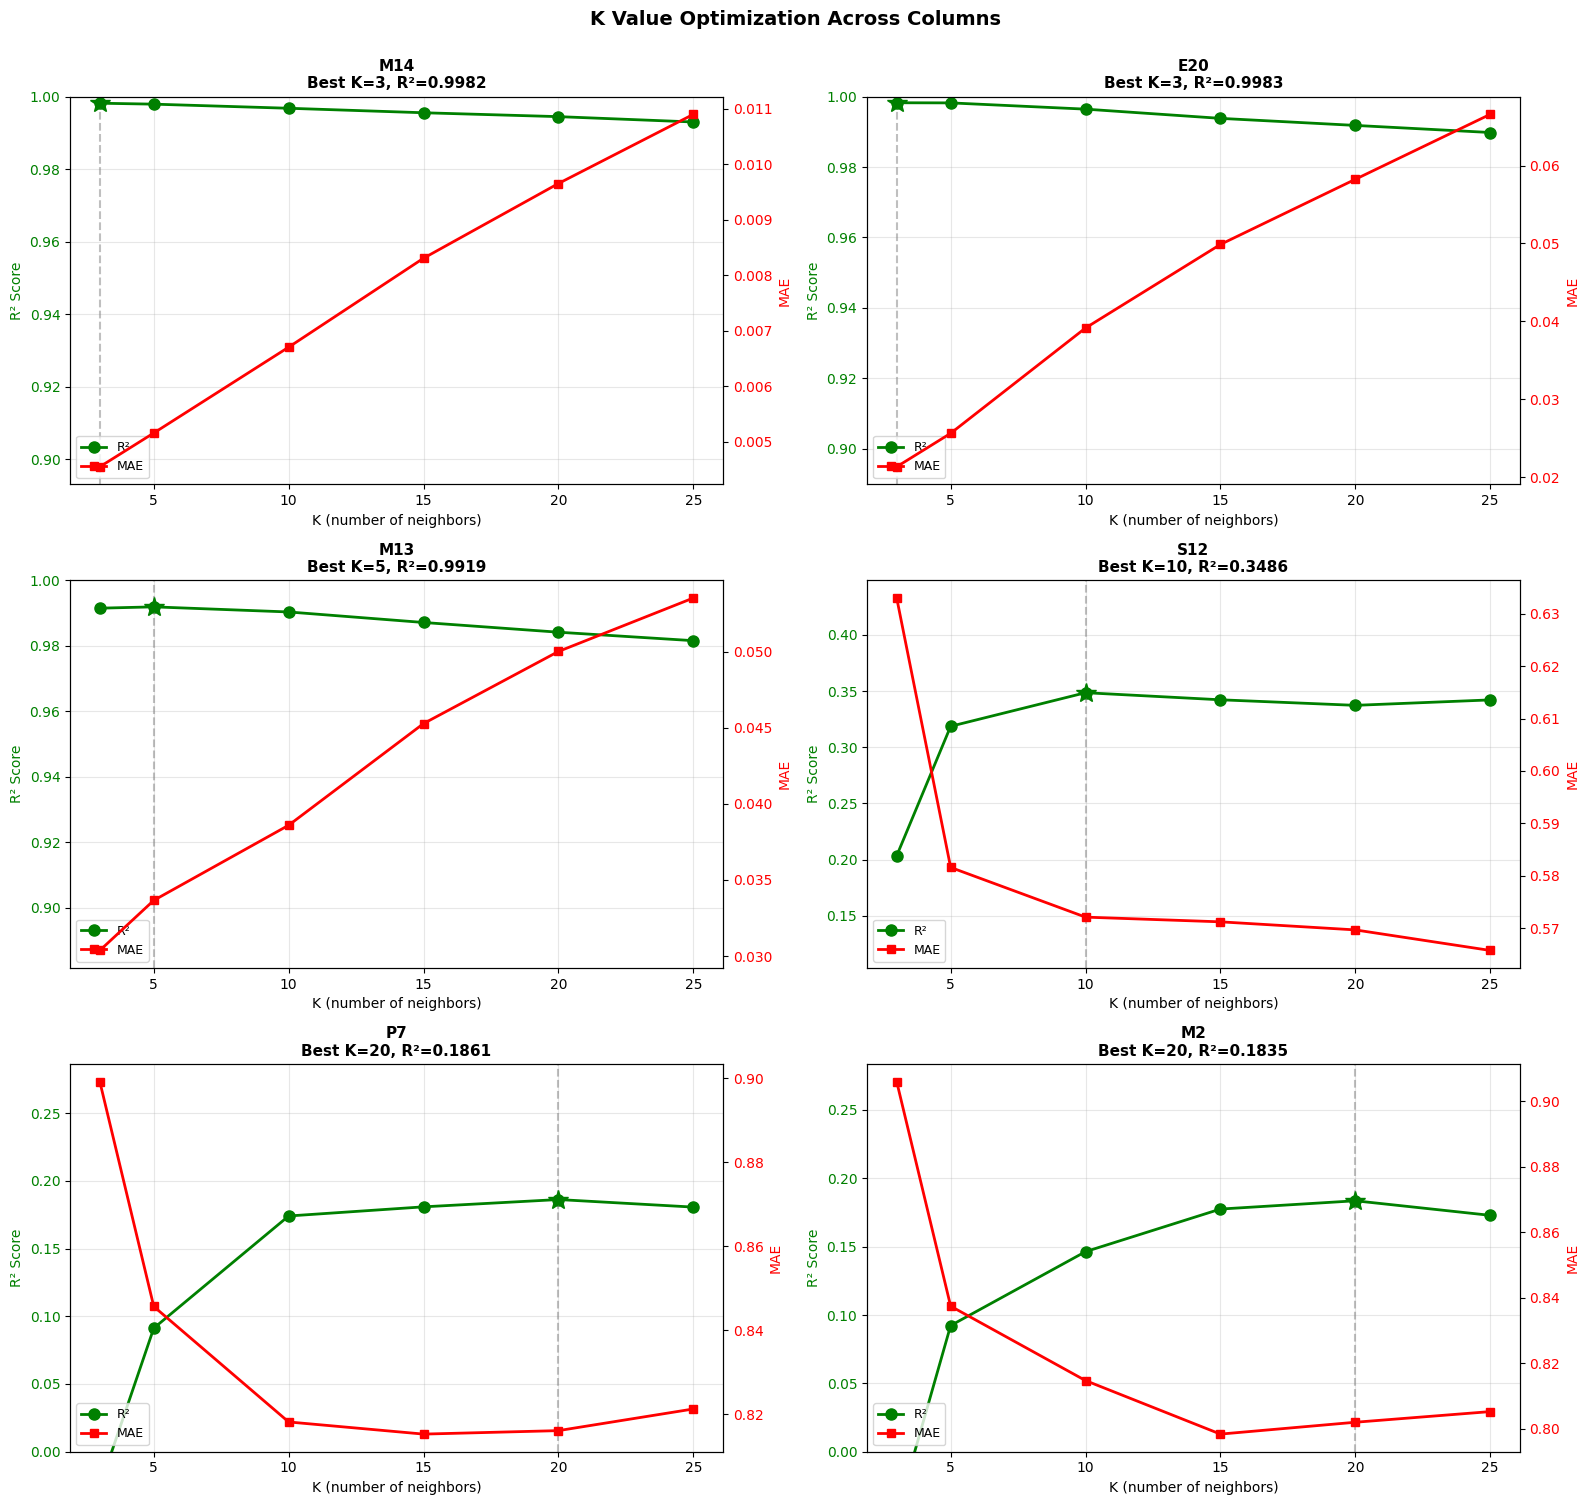


Best K values for all columns:
column  best_k      mae     rmse       r2       mape  metrics_agree  k_by_mae  k_by_rmse  k_by_r2  n_k_values_tested
   E20       3 0.021318 0.054291 0.998287   2.855535           True         3          3        3                  6
   M14       3 0.004550 0.007978 0.998211   0.521022           True         3          3        3                  6
    E1       5 0.016683 0.050761 0.993734   1.084614          False         3          5        5                  6
   M13       5 0.033660 0.058970 0.991918  20.549444          False         3          5        5                  6
    E7       3 0.124075 0.308302 0.986735  77.851634           True         3          3        3                  6
   V10       5 0.110009 0.160907 0.980026 126.221336          False         3          5        5                  6
    S8       3 0.126164 0.185345 0.972346  69.373539           True         3          3        3                  6
    V9       3 0.102319 0.197046

In [16]:

best_k_df, all_results_df = extract_k_from_results(results_dir='knn_results')

print_best_k_summary(best_k_df, r2_threshold=0.60)

visualize_k_comparison(all_results_df, columns_to_plot=None, max_cols=6)

print("\nBest K values for all columns:")
print(best_k_df.to_string(index=False))

best_k_df.to_csv('best_k_values.csv', index=False)
all_results_df.to_csv('all_k_test_results.csv', index=False)
print("\n Results saved to CSV files")

recommended_cols = create_imputation_config(
    best_k_df, 
    r2_threshold=0.80, 
    output_file='imputation_config.py'
)

# Step 7: Use the configuration to impute
# You can now import the config and use it:
# from imputation_config import IMPUTATION_CONFIG
# 
# for col, config in IMPUTATION_CONFIG.items():
#     imputer = ColumnWiseKNNImputer(
#         n_neighbors=config['k'],
#         exclude_from_distance=['date_id']
#     )
#     imputed_series, _ = imputer.impute_column(df, col, normalize=True)
#     df[col] = df[col].fillna(imputed_series)


---
### Perform Imputation
Here we're loading the imputation configuration file and actually performing the imputation and saving it to a new dataframe called tmp_train_df so that we don't overwrite the original df.

In [69]:
from imputation_config import IMPUTATION_CONFIG

tmp_train_df = normalized_df.copy(deep=True)[1006:]

for col, config in IMPUTATION_CONFIG.items():
    imputer = ColumnWiseKNNImputer(
        n_neighbors=config['k'],
    )
    imputed_series, _ = imputer.impute_column(tmp_train_df, col, normalize=False)
    tmp_train_df[col] = tmp_train_df[col].fillna(imputed_series)



Imputing column: 'E20'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'M14'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'E1'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'M13'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'E7'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'V10'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'S8'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'V9'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'M1'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'V7'
Using 97 columns for distance calculation
Excluded from distance: []

Imputing column: 'M5'
Using 97 columns for distance calculation
Excluded fr

---
## Recheck the missing values
This is looking much better now.

In [70]:
# Count NaN values in each column
reconstructed_df = pd.concat([normalized_df[:1006], tmp_train_df])
nan_counts = reconstructed_df.isna().sum()
for index, value in nan_counts.items():
    print(index, ": ", value)


D1 :  0
D2 :  0
D3 :  0
D4 :  0
D5 :  0
D6 :  0
D7 :  0
D8 :  0
D9 :  0
E1 :  1006
E10 :  1006
E11 :  1006
E12 :  1006
E13 :  1006
E14 :  1006
E15 :  1006
E16 :  1006
E17 :  1006
E18 :  1006
E19 :  1006
E2 :  1006
E20 :  1006
E3 :  1006
E4 :  1006
E5 :  1006
E6 :  1006
E7 :  1006
E8 :  1006
E9 :  1006
I1 :  1006
I2 :  1006
I3 :  1006
I4 :  1006
I5 :  1006
I6 :  1006
I7 :  1006
I8 :  1006
I9 :  1006
M1 :  1006
M10 :  1006
M11 :  1006
M12 :  1006
M13 :  1006
M14 :  1006
M15 :  1006
M16 :  1006
M17 :  1006
M18 :  1006
M2 :  3217
M3 :  2018
M4 :  1006
M5 :  1006
M6 :  1006
M7 :  1006
M8 :  1006
M9 :  1006
P1 :  1006
P10 :  1006
P11 :  1006
P12 :  1006
P13 :  1006
P2 :  1006
P3 :  1006
P4 :  1006
P5 :  1574
P6 :  1638
P7 :  1616
P8 :  1006
P9 :  1006
S1 :  1006
S10 :  1006
S11 :  1006
S12 :  3537
S2 :  1006
S3 :  1006
S4 :  1006
S5 :  1511
S6 :  1006
S7 :  1006
S8 :  1006
S9 :  1006
V1 :  1006
V10 :  1006
V11 :  1006
V12 :  1006
V13 :  1006
V2 :  1006
V3 :  1006
V4 :  1006
V5 :  1006
V6 :  

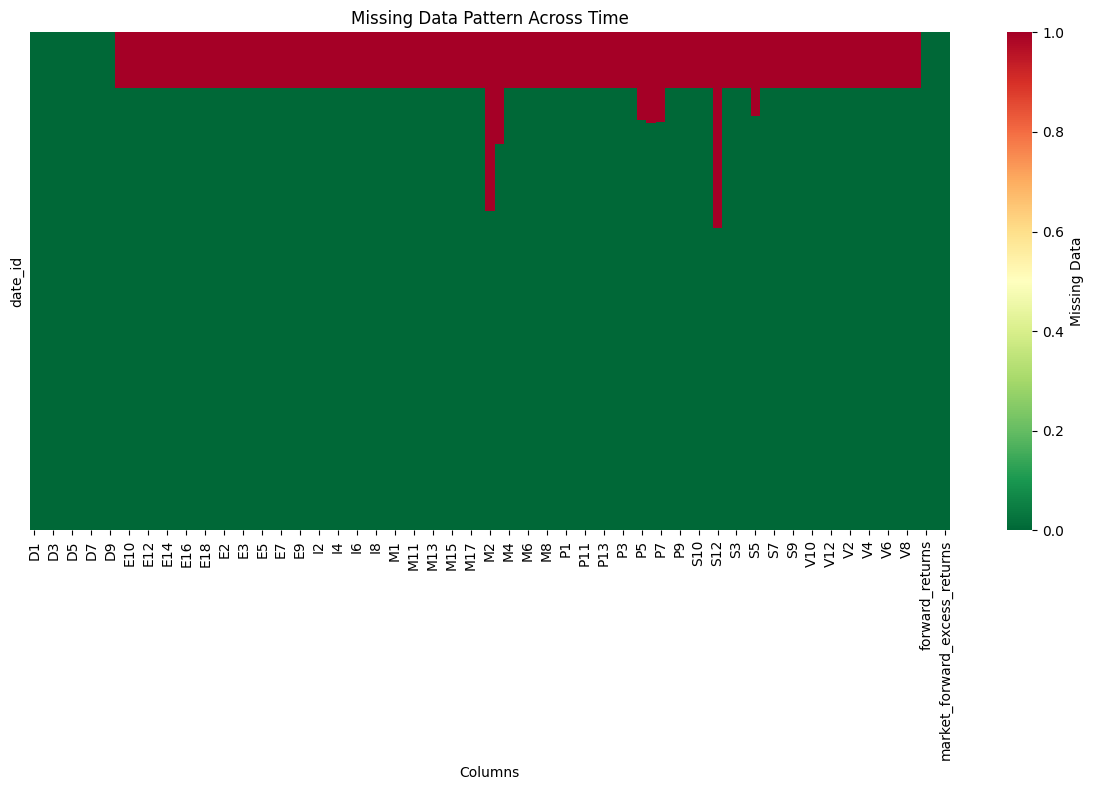

872030
872030


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

missing_mask = reconstructed_df.isna()

plt.figure(figsize=(12, 8))
sns.heatmap(
    missing_mask, 
    cbar=True,
    cmap='RdYlGn_r',
    yticklabels=False,
    cbar_kws={'label': 'Missing Data'}
)

plt.title('Missing Data Pattern Across Time')
plt.xlabel('Columns')
plt.ylabel('date_id')
plt.tight_layout()
plt.show()

print(reconstructed_df.size)
print(train_df.size)

---
## Save the new dataframe
Here we're just denormalizing the new data, then saving it to a csv file with the imputed values.

In [76]:
def fix_binary_column(series, expected_values=[0, 1]):
    """
    Fix floating point errors in binary columns by snapping to nearest expected value
    
    Parameters:
    - series: the column with floating point errors
    - expected_values: list of expected values (e.g., [-1, 0] or [0, 1])
    
    Returns:
    - fixed series with exact binary values
    """
    # For each value, find the nearest expected value
    def snap_to_nearest(x):
        if pd.isna(x):
            return x
        # Find closest expected value
        return min(expected_values, key=lambda exp: abs(x - exp))
    
    return series.apply(snap_to_nearest)

In [78]:
imputed_original_scale = inverse_transform_results(reconstructed_df, scaler)

for col in ['D1', 'D2', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9']:
    imputed_original_scale[col] = fix_binary_column(
        imputed_original_scale[col],
        expected_values=[0, 1]
    )

imputed_original_scale['D6'] = fix_binary_column(
        imputed_original_scale['D6'],
        expected_values=[-1, 0]
    )

---
## Double Checking correctness
Here, I'm just double checking that I reconstructed the original correctly with proper rescaling.

In [101]:
def check_dataframes_match(df_original, df_imputed, tolerance=1e-10):
    """
    Check if imputed DataFrame matches original where original had values
    """
    
    print(f"Checking {len(df_original.columns)} columns...\n")
    
    all_match = True
    total_mismatches = 0
    
    for col in df_original.columns:
        # Get mask of where original had values
        had_values = df_original[col].notna()
        n_had_values = had_values.sum()
        
        if n_had_values == 0:
            continue
        
        # Get the actual values (using .values to ensure alignment)
        original_vals = df_original.loc[had_values, col].values
        imputed_vals = df_imputed.loc[had_values, col].values
        
        # Find mismatches
        differences = np.abs(original_vals - imputed_vals)
        mismatches = differences > tolerance
        n_mismatches = mismatches.sum()
        
        if n_mismatches > 0:
            all_match = False
            total_mismatches += n_mismatches
            max_diff = differences.max()
            
            print(f"{col}: {n_mismatches}/{n_had_values} mismatches (max diff: {max_diff:.2e})")
            
            # Show first few examples
            mismatch_positions = np.where(mismatches)[0][:5]
            indices = df_original.index[had_values][mismatch_positions]
            
            for i, idx in enumerate(indices):
                orig = df_original.loc[idx, col]
                imp = df_imputed.loc[idx, col]
                diff = imp - orig
                print(f"   Index {idx}: Original={orig:.10f}, Imputed={imp:.10f}, Diff={diff:.2e}")
            
            if n_mismatches > 5:
                print(f"   ... and {n_mismatches - 5} more")
            print()
    
    print(f"\n{'='*70}")
    if all_match:
        print("All non-NaN values match")
    else:
        print(f"Total mismatches found: {total_mismatches}")
    print(f"{'='*70}")
    
    return all_match


# Usage:
# check_dataframes_match(df, df_imputed)

In [102]:
check_dataframes_match(train_df, imputed_original_scale)

Checking 97 columns...


All non-NaN values match


True

In [103]:
train_df.shape

(8990, 97)

---
## Writing the newly imputed df
Finally, after rescaling and checking for correctness, we write the new dataframe to a csv file.

In [108]:
data_dir = pathlib.Path("data")
imputed_output = pathlib.Path(data_dir, "train_imputed_vals.csv")

imputed_original_scale.to_csv(imputed_output)
